<a href="https://www.kaggle.com/code/sonawanelalitsunil/breast-cancer-dataset-logistic?scriptVersionId=205915120" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/breast-cancer-dataset/breast-cancer.csv


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import pylab
import warnings
warnings.filterwarnings("ignore")

In [3]:
from sklearn.feature_selection import mutual_info_classif
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
import xgboost as xgb
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_curve,auc

In [4]:
df = pd.read_csv("/kaggle/input/breast-cancer-dataset/breast-cancer.csv")
df.head()


id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  radius_worst  texture_worst  perimeter_worst  area_worst  \
0  ...         25.38          17.33           184.60      2019.0   
1  ...         24.99          23.41           158.80      1956.0   
2  ...         23.57          25.53           152.50      1709.0   
3  ...         14.91          26.50            98.87       567.7   
4  ...         22.54          16.67           152.20      1575.0   

   smoothness_worst  compactness_worst  concavity_worst  concave points_worst  \
0            0.1622             0.6656           0.7119                0.2654   
1            0.1238             0.1866           0.2416                0.1860   
2            0.1444             0.4245           0.4504                0.2430   
3            0.2098             0.8663           0.6869                0.2575   
4            0.1374             0.2050           0.4000                0.1625   

   symmetry_worst  fractal_dimension_worst  
0          0.4601                  0.11890  
1          0.2750                  0.08902  
2          0.3613                  0.08758  
3          0.6638                  0.17300  
4          0.2364                  0.07678  

[5 rows x 32 columns]

In [5]:
df.shape

(569, 32)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [7]:
df.describe()

id  radius_mean  texture_mean  perimeter_mean    area_mean  \
count  5.690000e+02   569.000000    569.000000      569.000000   569.000000   
mean   3.037183e+07    14.127292     19.289649       91.969033   654.889104   
std    1.250206e+08     3.524049      4.301036       24.298981   351.914129   
min    8.670000e+03     6.981000      9.710000       43.790000   143.500000   
25%    8.692180e+05    11.700000     16.170000       75.170000   420.300000   
50%    9.060240e+05    13.370000     18.840000       86.240000   551.100000   
75%    8.813129e+06    15.780000     21.800000      104.100000   782.700000   
max    9.113205e+08    28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380        0.000000             0.000000   
25%           0.086370          0.064920        0.029560             0.020310   
50%           0.095870          0.092630        0.061540             0.033500   
75%           0.105300          0.130400        0.130700             0.074000   
max           0.163400          0.345400        0.426800             0.201200   

       symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
count     569.000000  ...    569.000000     569.000000       569.000000   
mean        0.181162  ...     16.269190      25.677223       107.261213   
std         0.027414  ...      4.833242       6.146258        33.602542   
min         0.106000  ...      7.930000      12.020000        50.410000   
25%         0.161900  ...     13.010000      21.080000        84.110000   
50%         0.179200  ...     14.970000      25.410000        97.660000   
75%         0.195700  ...     18.790000      29.720000       125.400000   
max         0.304000  ...     36.040000      49.540000       251.200000   

        area_worst  smoothness_worst  compactness_worst  concavity_worst  \
count   569.000000        569.000000         569.000000       569.000000   
mean    880.583128          0.132369           0.254265         0.272188   
std     569.356993          0.022832           0.157336         0.208624   
min     185.200000          0.071170           0.027290         0.000000   
25%     515.300000          0.116600           0.147200         0.114500   
50%     686.500000          0.131300           0.211900         0.226700   
75%    1084.000000          0.146000           0.339100         0.382900   
max    4254.000000          0.222600           1.058000         1.252000   

       concave points_worst  symmetry_worst  fractal_dimension_worst  
count            569.000000      569.000000               569.000000  
mean               0.114606        0.290076                 0.083946  
std                0.065732        0.061867                 0.018061  
min                0.000000        0.156500                 0.055040  
25%                0.064930        0.250400                 0.071460  
50%                0.099930        0.282200                 0.080040  
75%                0.161400        0.317900                 0.092080  
max                0.291000        0.663800                 0.207500  

[8 rows x 31 columns]

### Univeriate Analysis

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

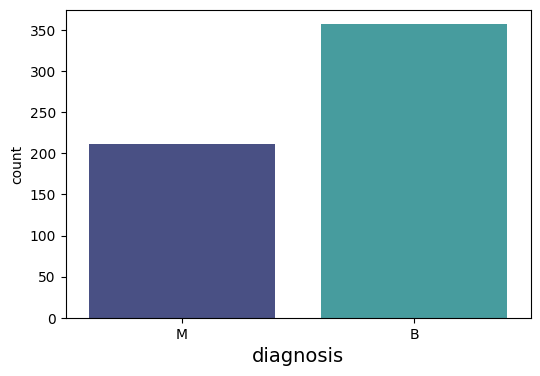

In [9]:
plt.figure(figsize=(6,4))
sns.countplot(x="diagnosis", data=df, palette="mako")
plt.xlabel("diagnosis", fontsize=14)
plt.show()

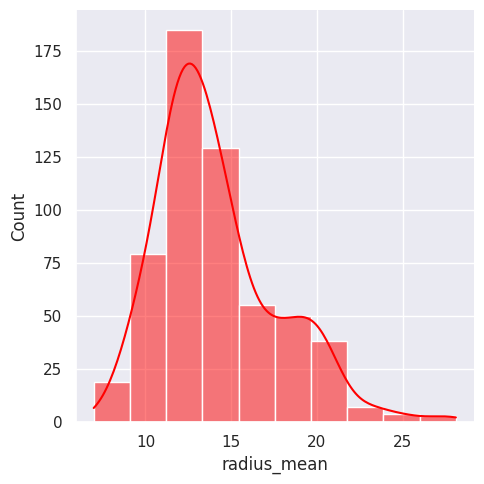

In [10]:
sns.set(rc={"figure.figsize":(6,5)})
sns.displot(df["radius_mean"], kde=True, color="red", bins=10)

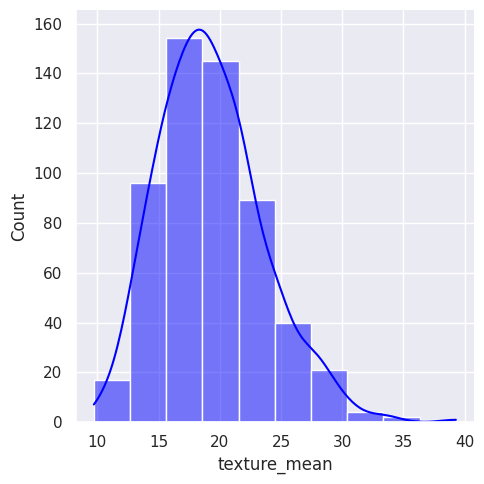

In [11]:
sns.set(rc={"figure.figsize":(6,4)})
sns.displot(df["texture_mean"], kde=True, color="blue", bins=10)

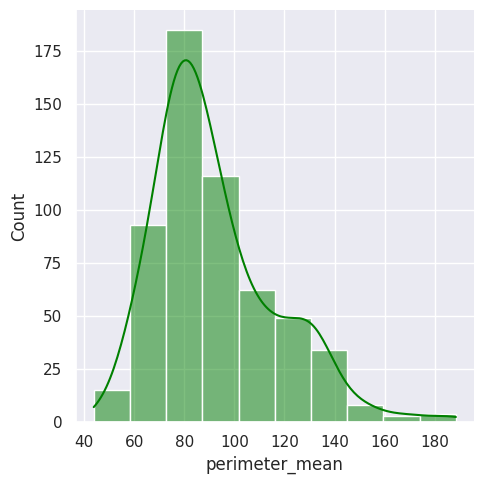

In [12]:
sns.set(rc={"figure.figsize":(6,4)})
sns.displot(df["perimeter_mean"], kde=True, color="Green", bins=10)

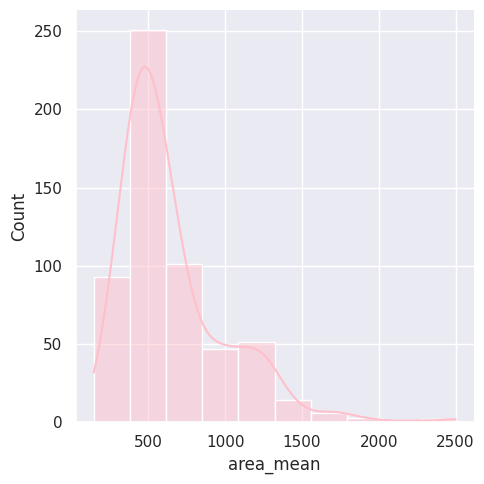

In [13]:
sns.set(rc={"figure.figsize":(6,4)})
sns.displot(df["area_mean"], kde=True, color="pink", bins=10)

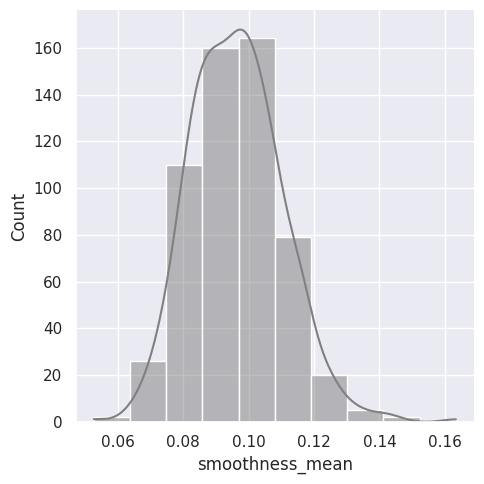

In [14]:
sns.set(rc={"figure.figsize":(6,4)})
sns.displot(df["smoothness_mean"], kde=True, color="gray", bins=10)

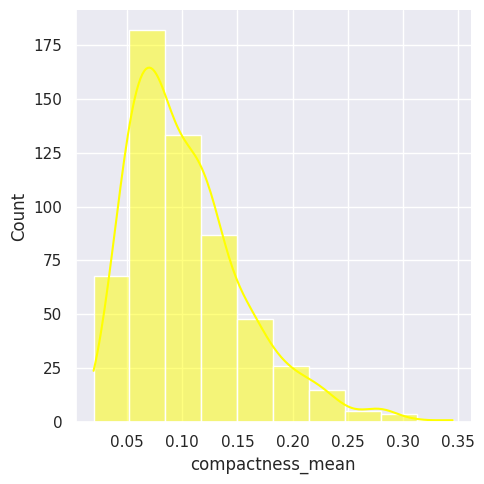

In [15]:
sns.set(rc={"figure.figsize":(6,4)})
sns.displot(df["compactness_mean"], kde=True, color="yellow", bins=10)


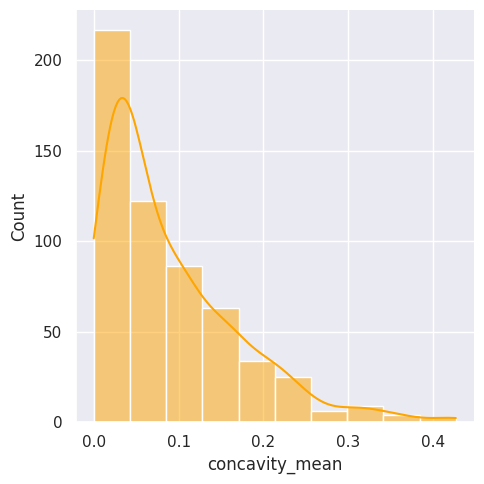

In [16]:
sns.set(rc={"figure.figsize":(6,4)})
sns.displot(df["concavity_mean"], kde=True, color="orange", bins=10)

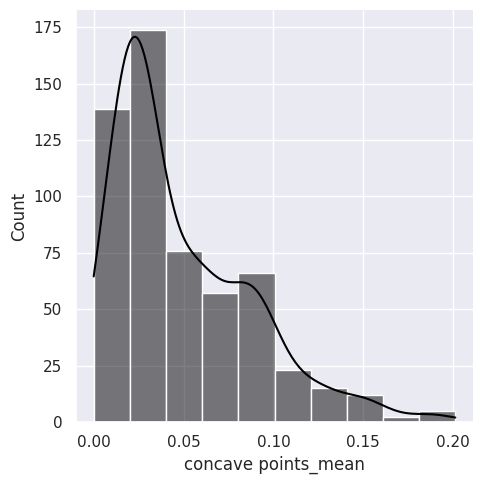

In [17]:
sns.set(rc={"figure.figsize":(6,4)})
sns.displot(df["concave points_mean"], kde=True, color="black", bins=10)

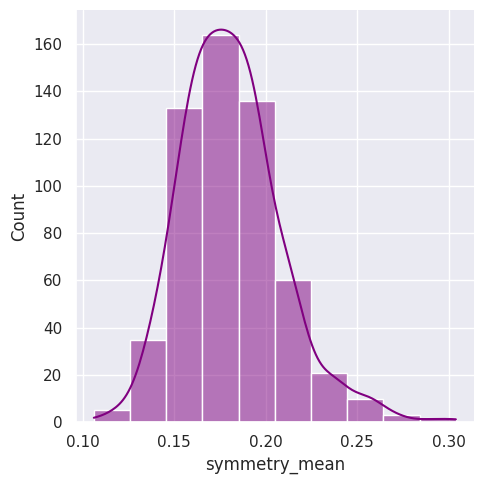

In [18]:
sns.set(rc={"figure.figsize":(6,4)})
sns.displot(df["symmetry_mean"], kde=True, color="purple", bins=10)

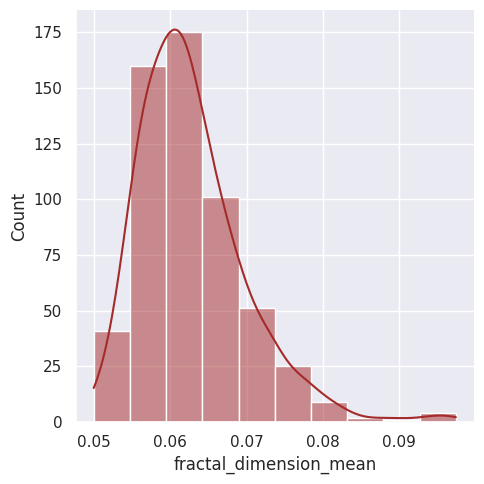

In [19]:
sns.set(rc={"figure.figsize":(6,4)})
sns.displot(df["fractal_dimension_mean"], kde=True, color="brown", bins=10)


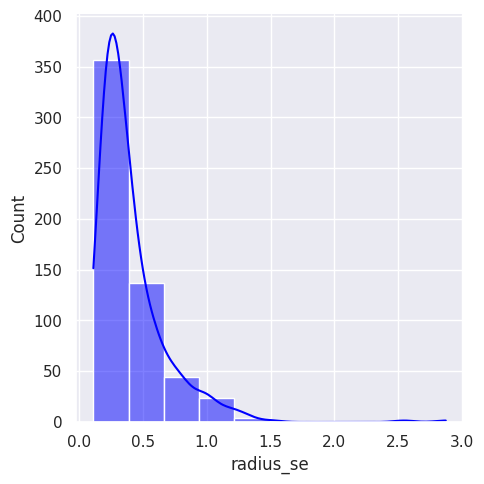

In [20]:
 sns.set(rc={"figure.figsize":(6,4)})
sns.displot(df["radius_se"], kde=True, color="blue", bins=10)


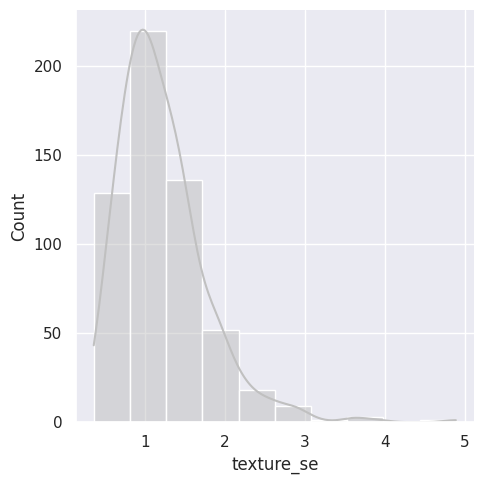

In [21]:
sns.set(rc={"figure.figsize":(6,4)})
sns.displot(df["texture_se"], kde=True, color="silver", bins=10)

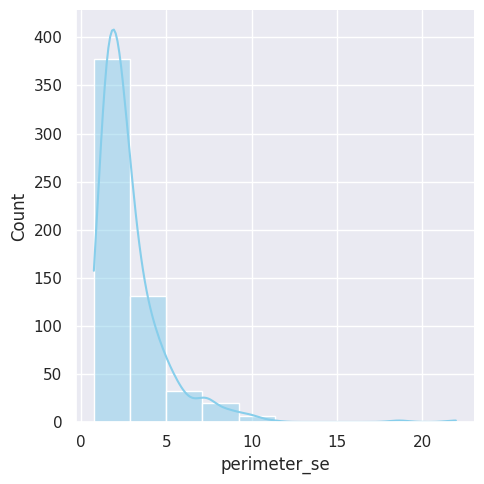

In [22]:
sns.set(rc={"figure.figsize":(6,4)})
sns.displot(df["perimeter_se"], kde=True, color="skyblue", bins=10)


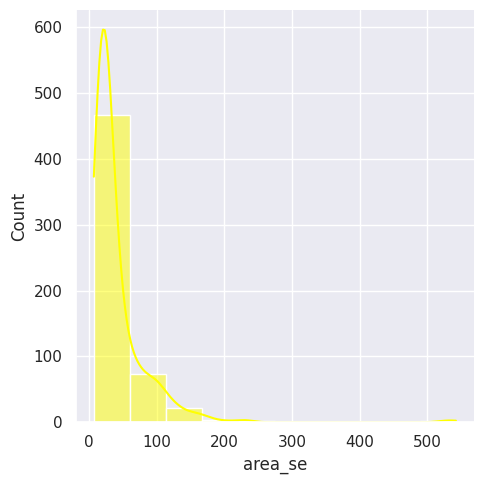

In [23]:
sns.set(rc={"figure.figsize":(6,4)})
sns.displot(df["area_se"], kde=True, color="yellow", bins=10)

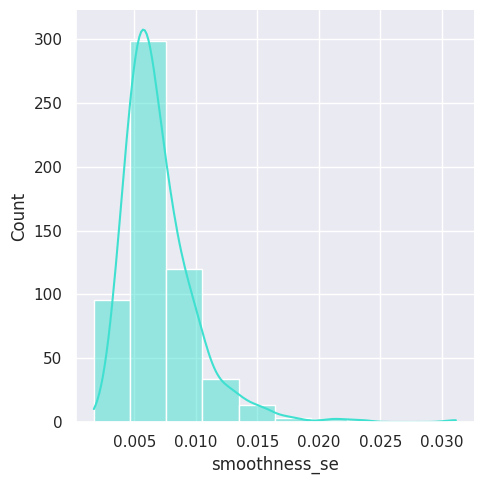

In [24]:
sns.set(rc={"figure.figsize":(6,4)})
sns.displot(df["smoothness_se"], kde=True, color="Turquoise", bins=10)

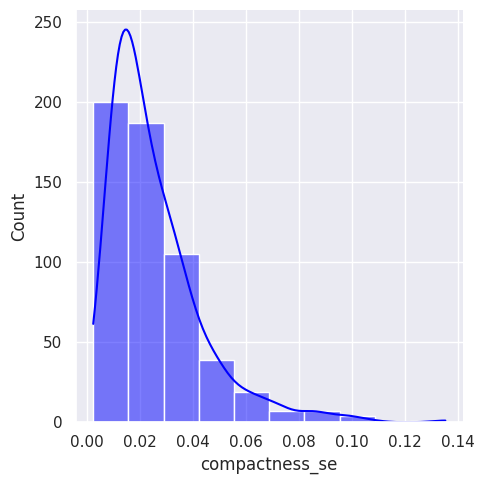

In [25]:
 sns.set(rc={"figure.figsize":(6,4)})
sns.displot(df["compactness_se"], kde=True, color="blue", bins=10)


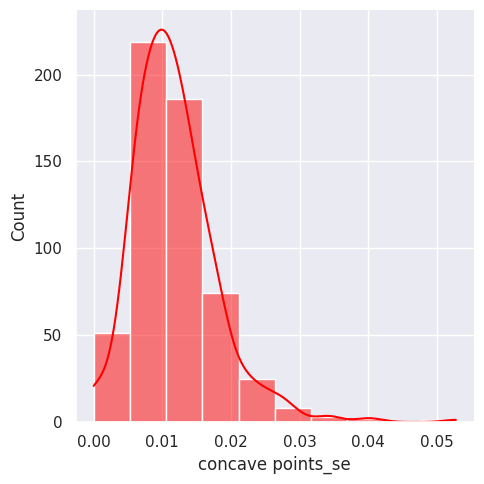

In [26]:
sns.set(rc={"figure.figsize":(6,4)})
sns.displot(df["concave points_se"], kde=True, color="red", bins=10)


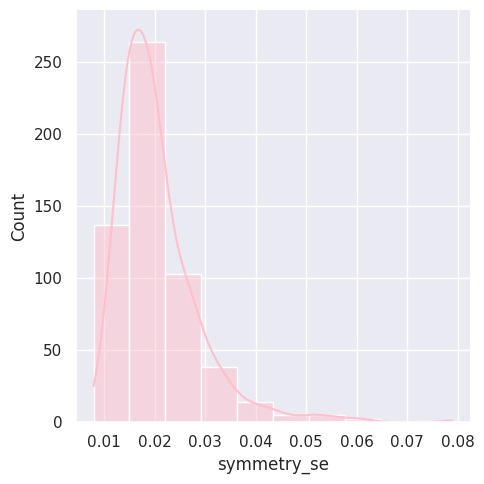

In [27]:
sns.set(rc={"figure.figsize":(6,4)})
sns.displot(df["symmetry_se"], kde=True, color="pink", bins=10)

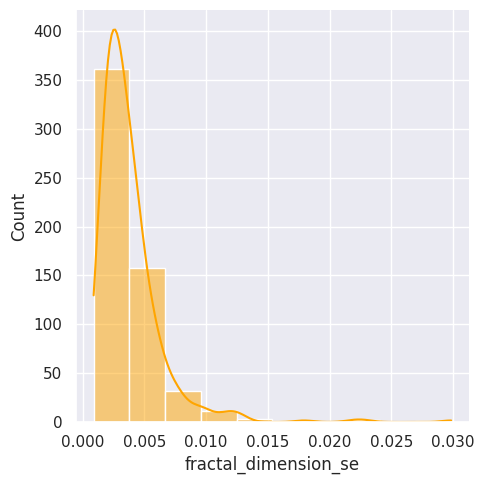

In [28]:
sns.set(rc={"figure.figsize":(6,4)})
sns.displot(df["fractal_dimension_se"], kde=True, color="orange", bins=10)

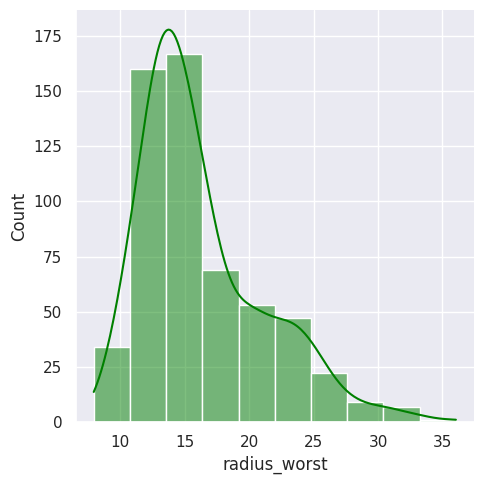

In [29]:
sns.set(rc={"figure.figsize":(6,4)})
sns.displot(df["radius_worst"], kde=True, color="green", bins=10)
plt.show()

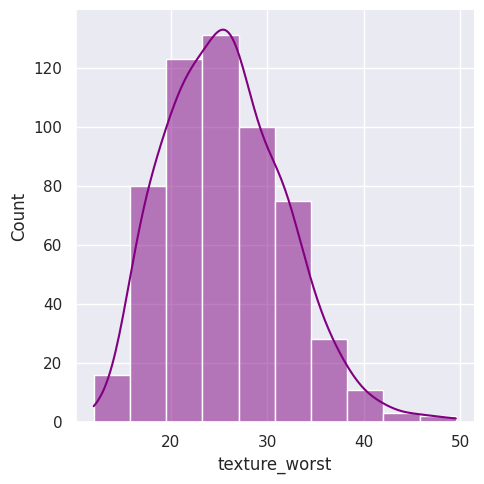

In [30]:
sns.set(rc={"figure.figsize":(6,4)})
sns.displot(df["texture_worst"], kde=True, color="purple", bins=10)

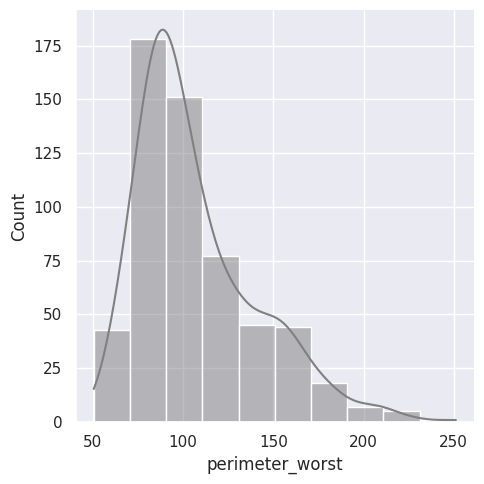

In [31]:
sns.set(rc={"figure.figsize":(6,4)})
sns.displot(df["perimeter_worst"], kde=True, color="gray", bins=10)

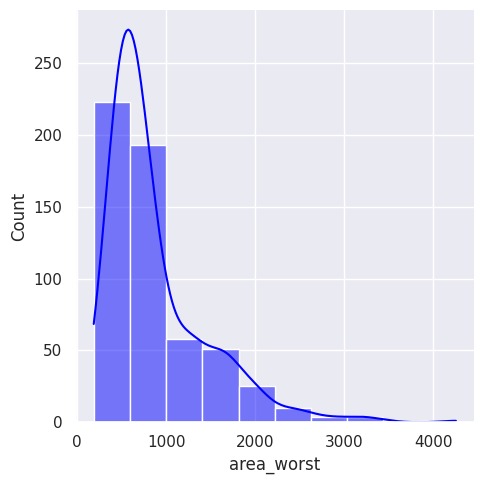

In [32]:
sns.set(rc={"figure.figsize":(6,4)})
sns.displot(df["area_worst"], kde=True, color="blue", bins=10)


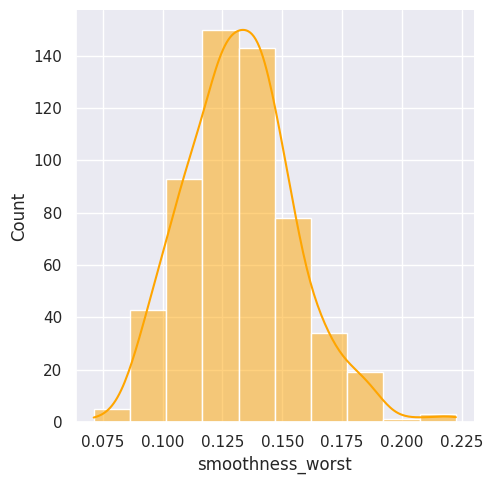

In [33]:
sns.set(rc={"figure.figsize":(6,4)})
sns.displot(df["smoothness_worst"], kde=True, color="orange", bins=10)

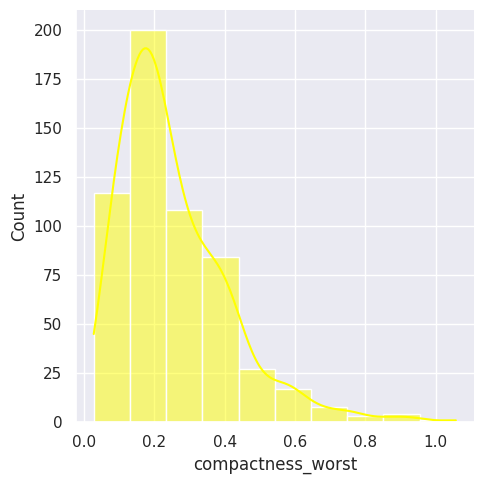

In [34]:
sns.set(rc={"figure.figsize":(6,4)})
sns.displot(df["compactness_worst"], kde=True, color="yellow", bins=10)


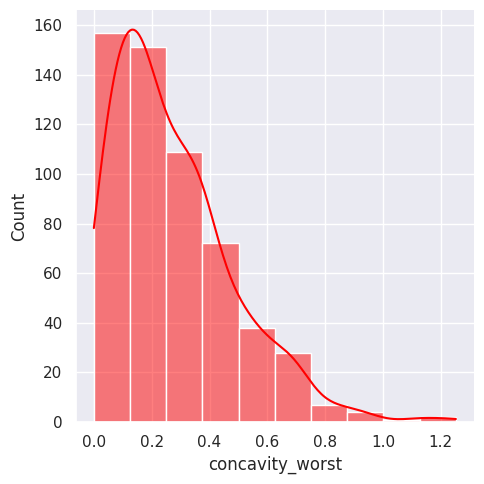

In [35]:
sns.set(rc={"figure.figsize":(6,4)})
sns.displot(df["concavity_worst"], kde=True, color="red", bins=10)


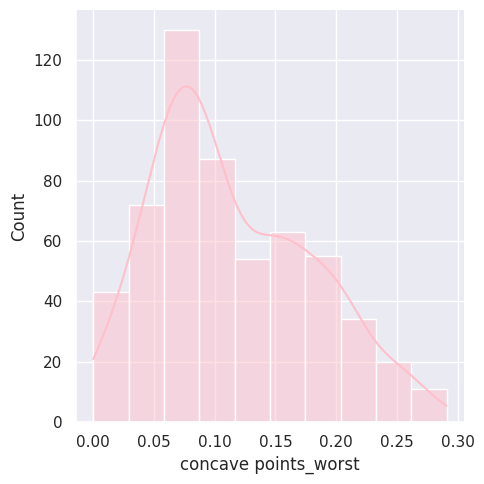

In [36]:
sns.set(rc={"figure.figsize":(6,4)})
sns.displot(df["concave points_worst"], kde=True, color="pink", bins=10)

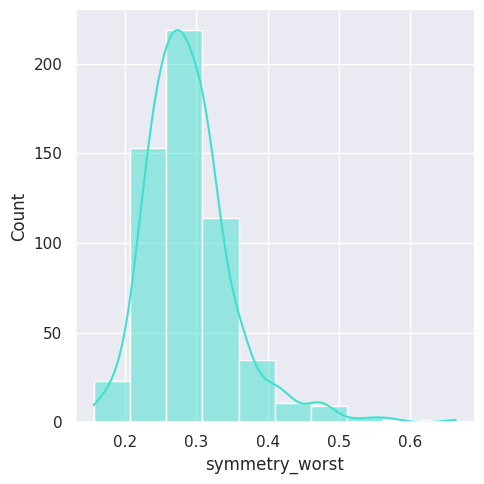

In [37]:
sns.set(rc={"figure.figsize":(6,4)})
sns.displot(df["symmetry_worst"], kde=True, color="Turquoise", bins=10)


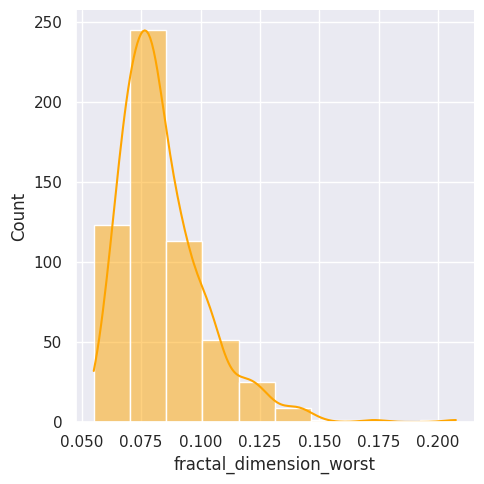

In [38]:
sns.set(rc={"figure.figsize":(6,4)})
sns.displot(df["fractal_dimension_worst"], kde=True, color="orange", bins=10)


# EDA (Exploratory Data Analysis)

In [39]:
duplicate = df.duplicated()
print(duplicate.sum())

0


In [40]:
df.isnull().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [41]:
df.isnull().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

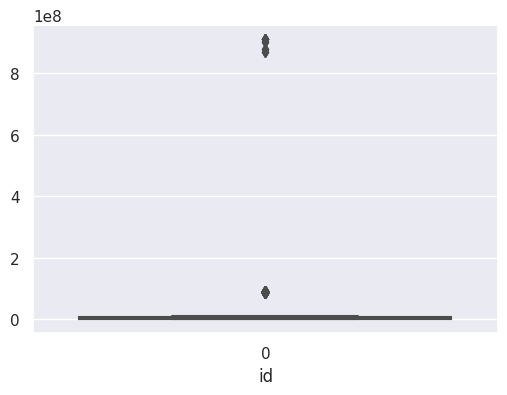

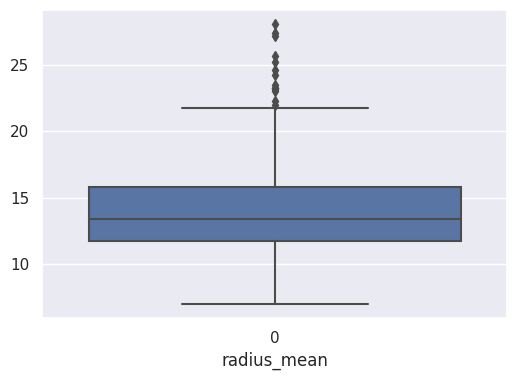

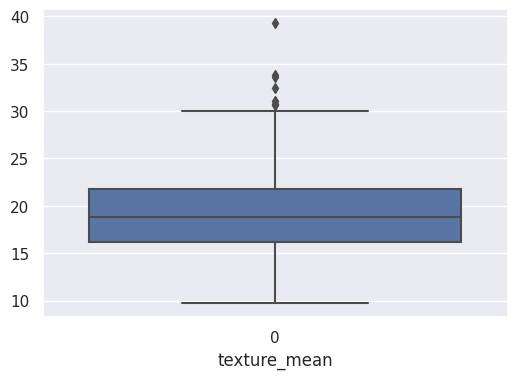

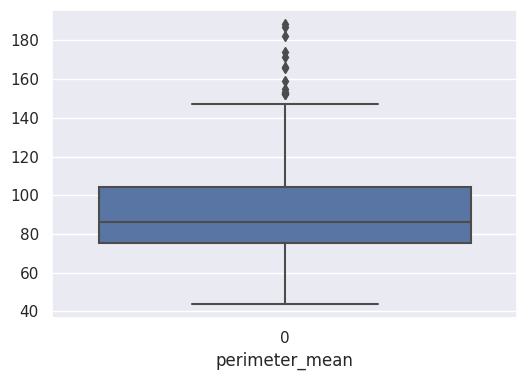

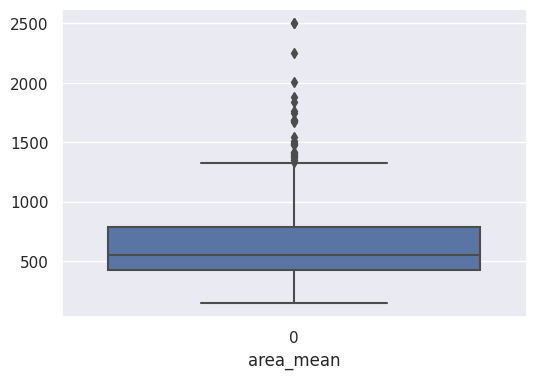

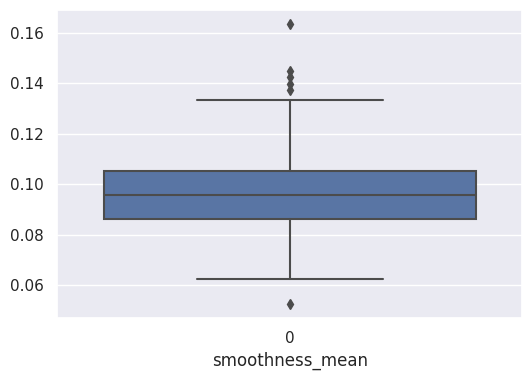

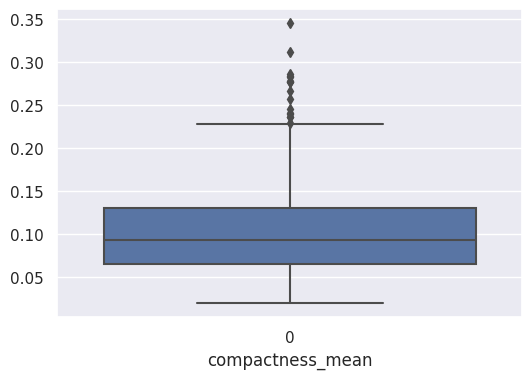

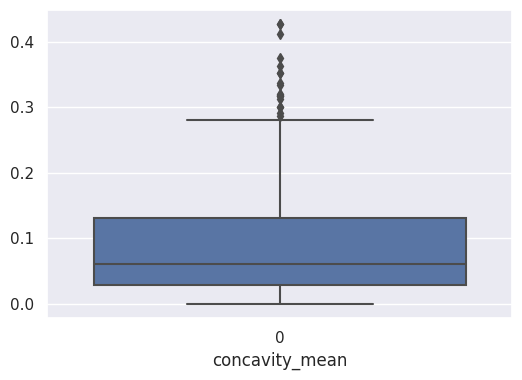

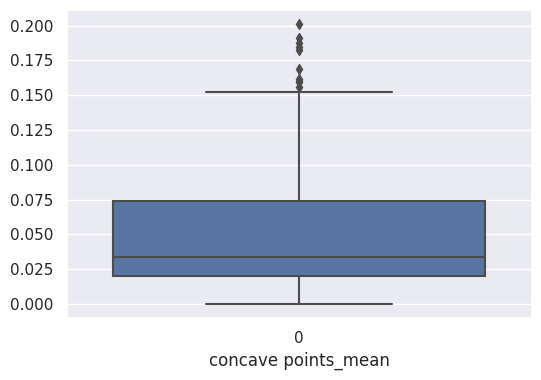

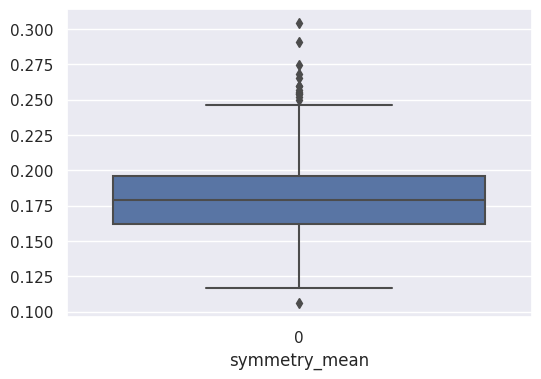

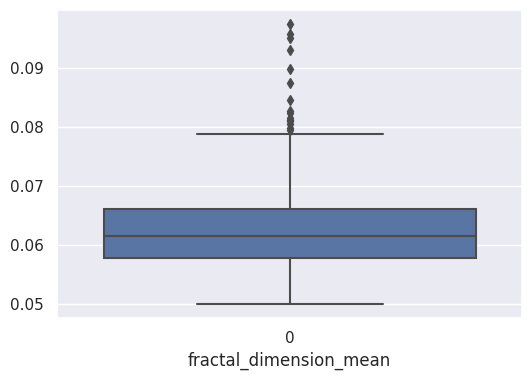

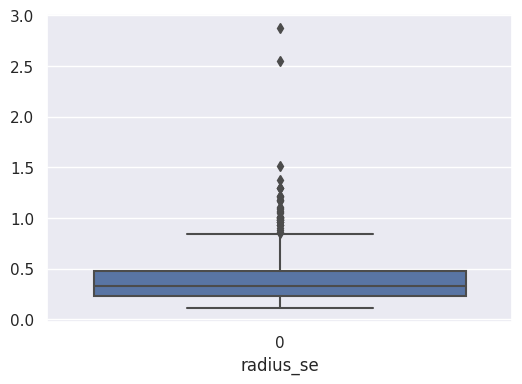

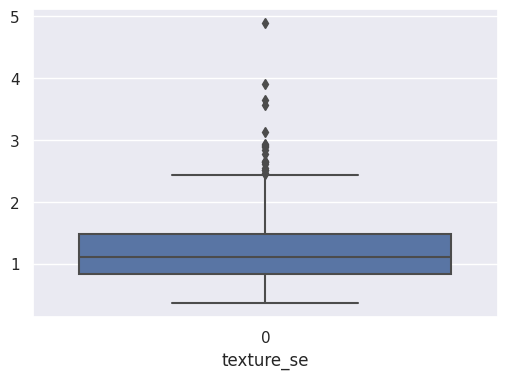

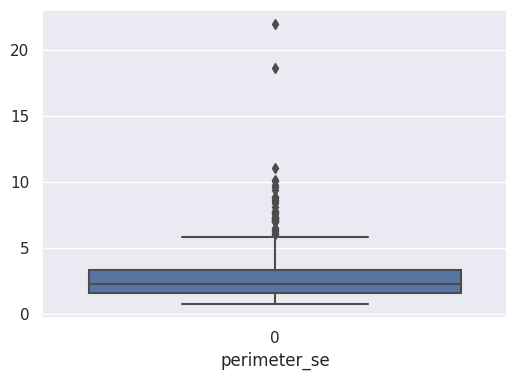

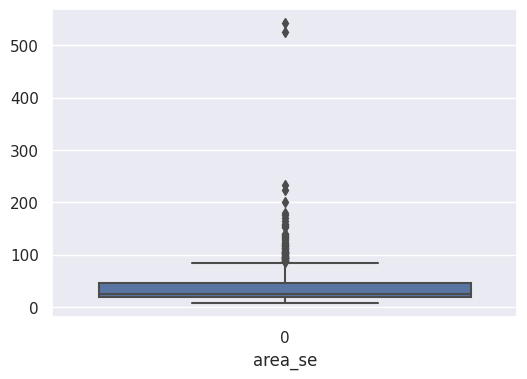

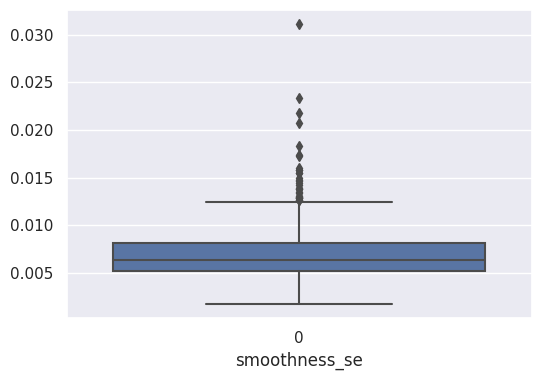

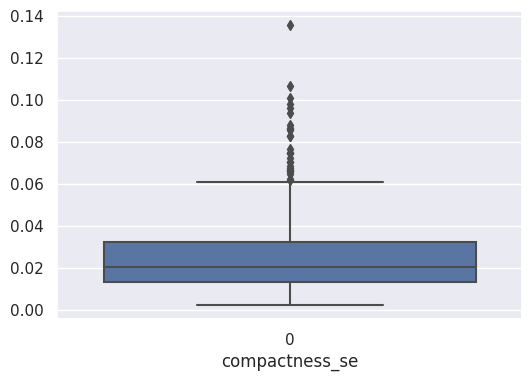

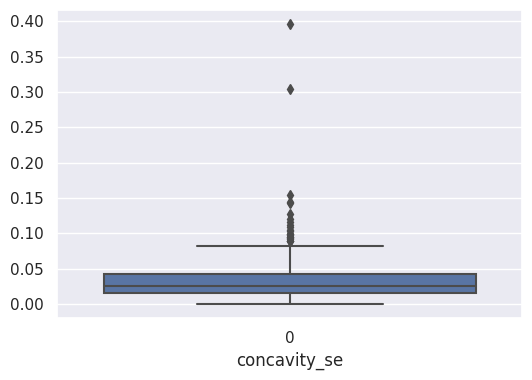

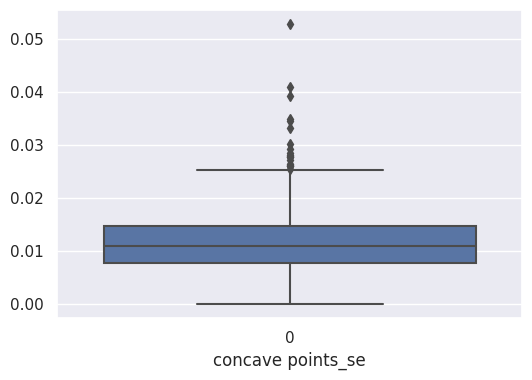

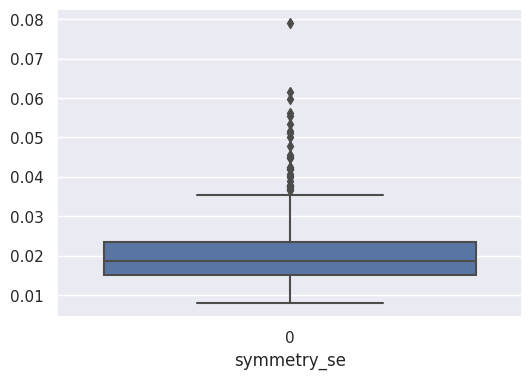

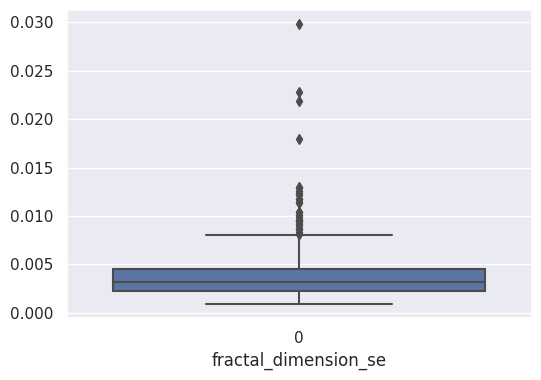

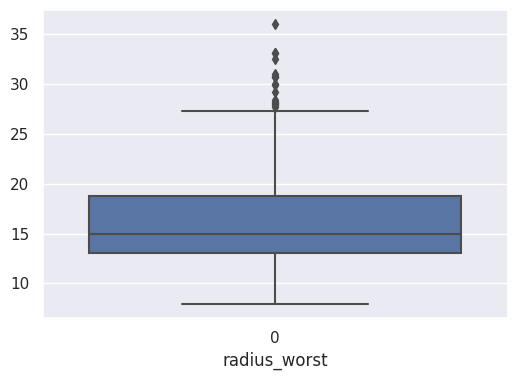

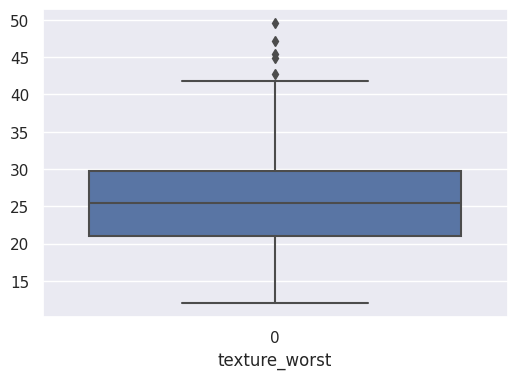

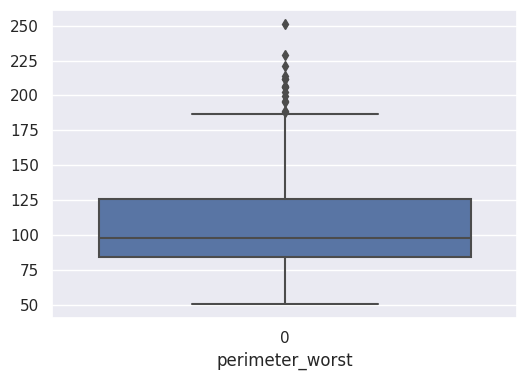

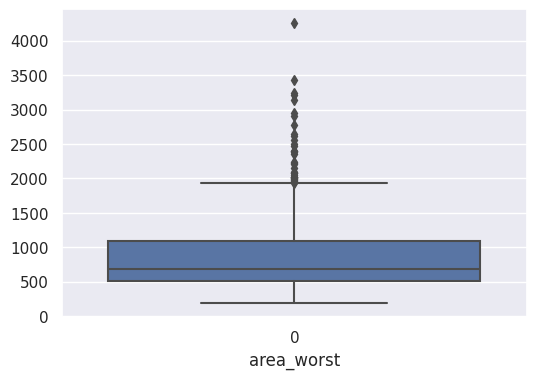

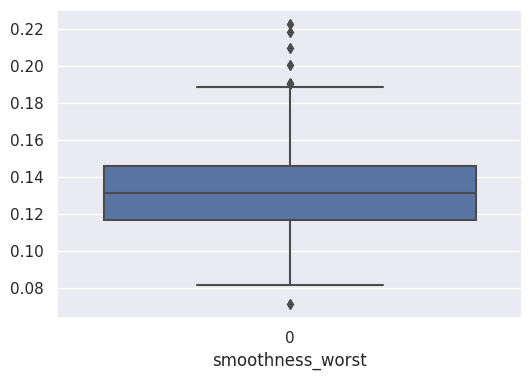

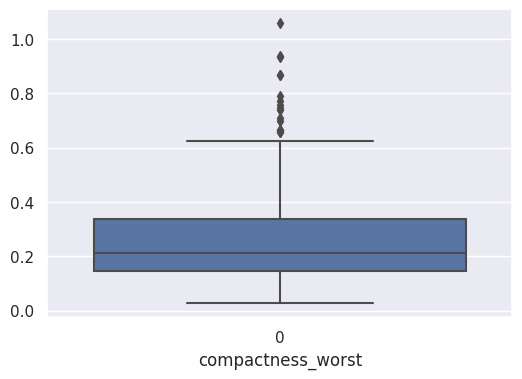

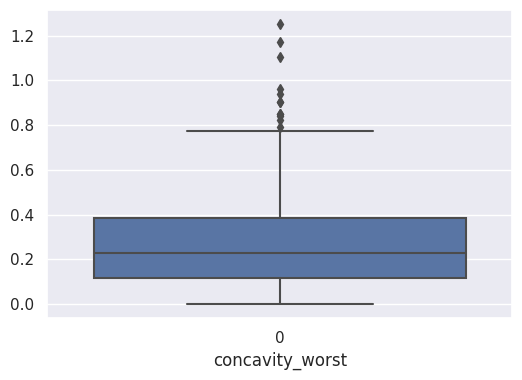

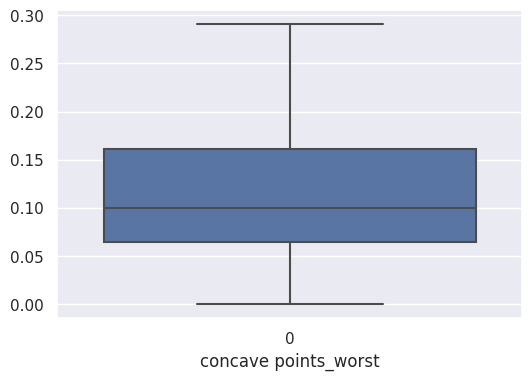

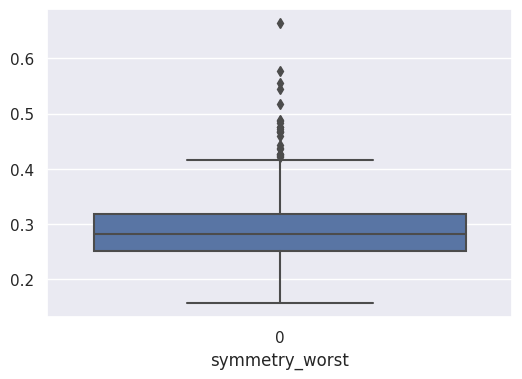

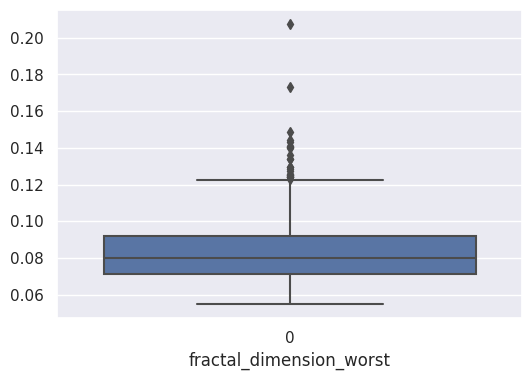

In [42]:
num_cols = df.select_dtypes(["float64","int64"])
for i in num_cols.columns:
    sns.boxplot(df[i])
    plt.xlabel(i)
    plt.show()

In [43]:
def remove_outlier(col):
    Q1, Q3 = col.quantile([0.25, 0.75])  # Calculate the first and third quartiles
    IQR = Q3 - Q1                         # Calculate the Interquartile Range (IQR)
    lower_range = Q1 - (1.5 * IQR)        # Define the lower bound
    upper_range = Q3 + (1.5 * IQR)        # Define the upper bound
    return lower_range, upper_range


In [44]:
for i in num_cols.columns:
    lower_range,upper_range = remove_outlier(df[i])
    df[i] = np.where(df[i] > upper_range, upper_range, df[i])
    df[i] = np.where(df[i] < lower_range, lower_range, df[i])


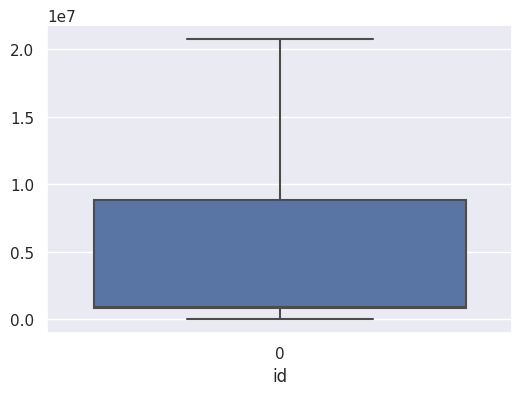

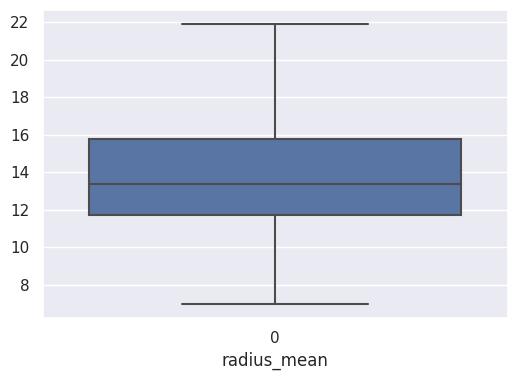

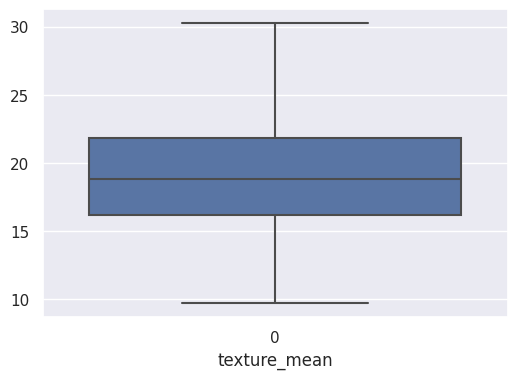

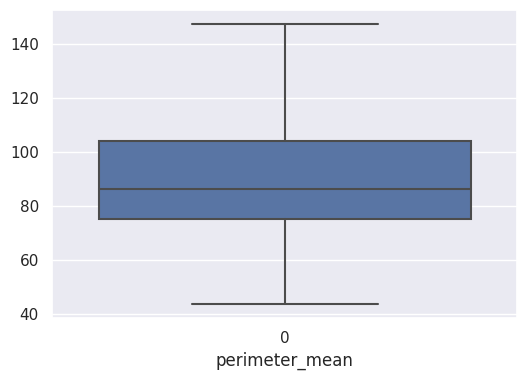

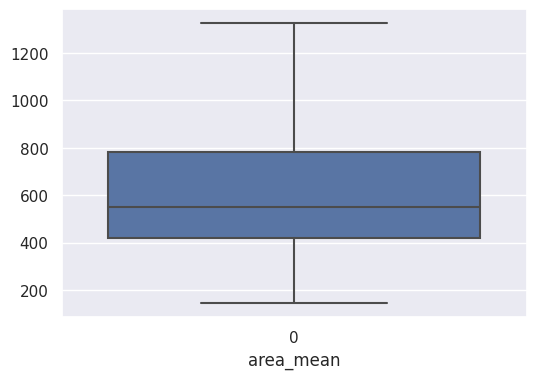

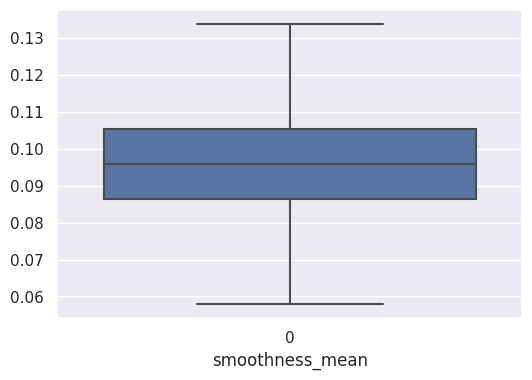

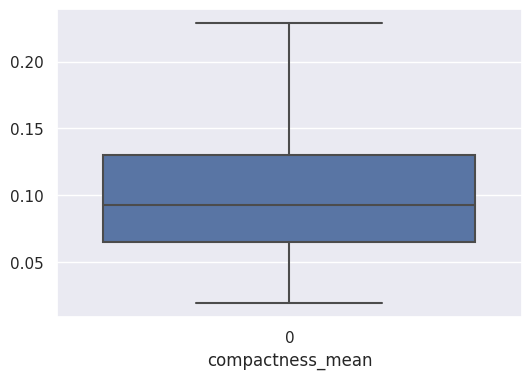

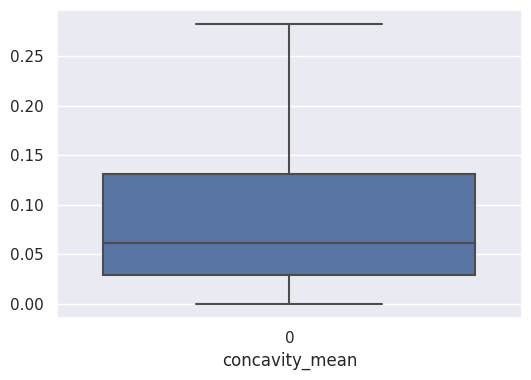

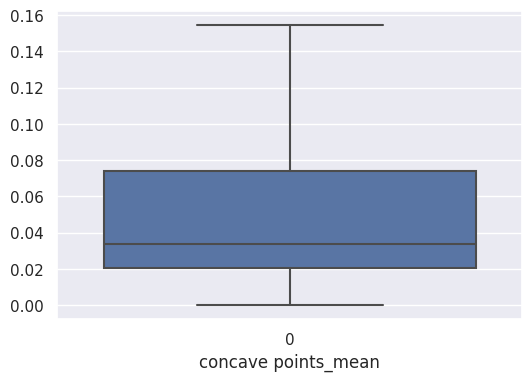

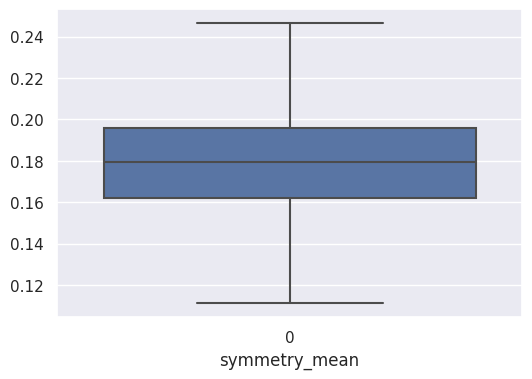

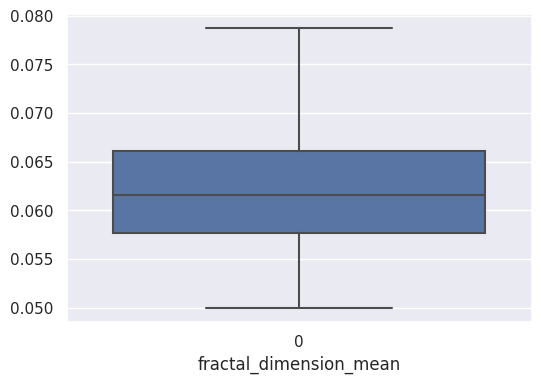

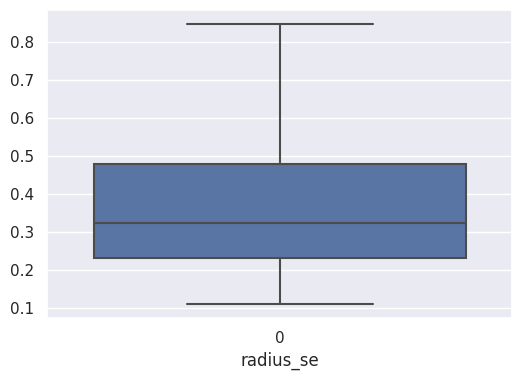

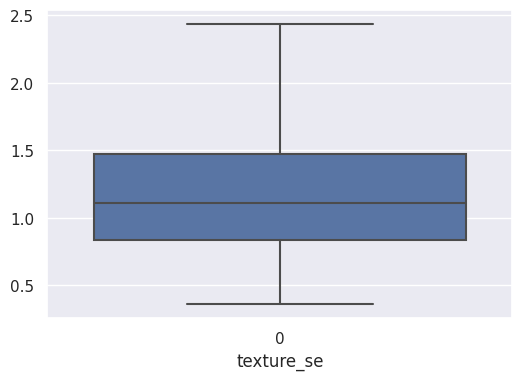

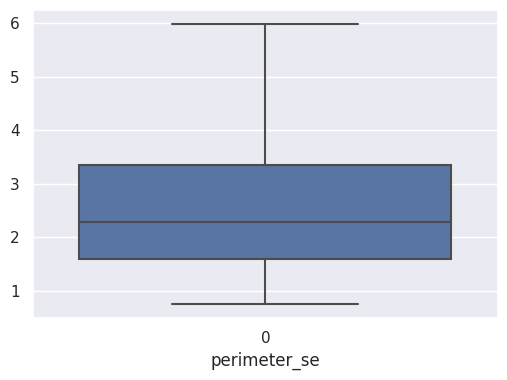

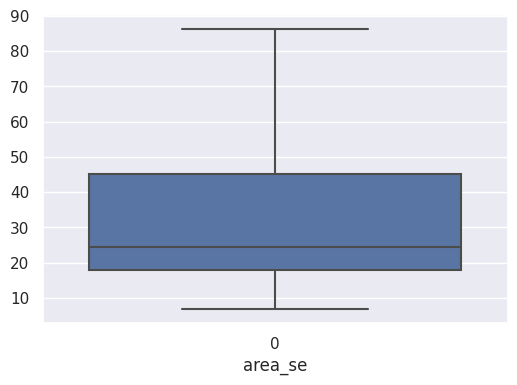

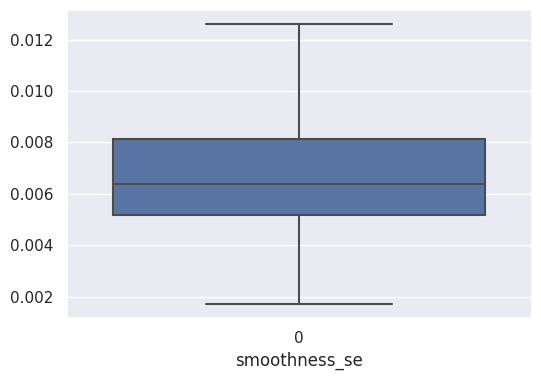

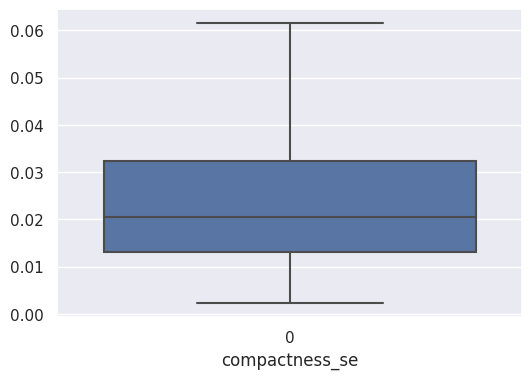

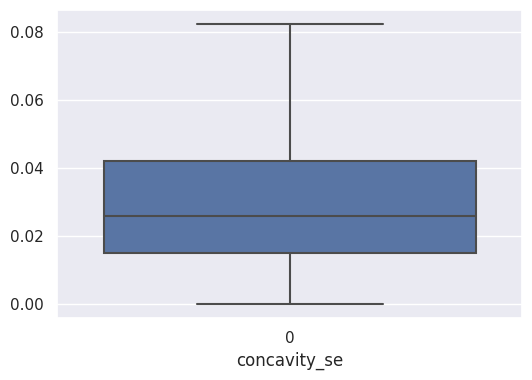

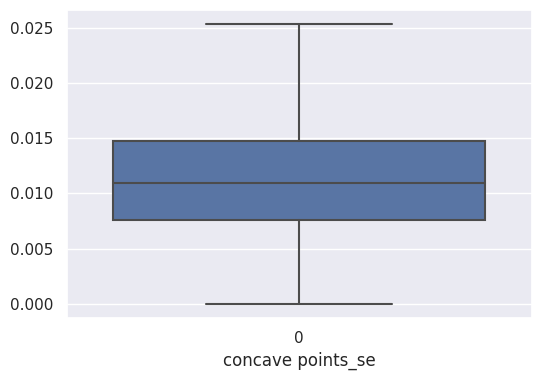

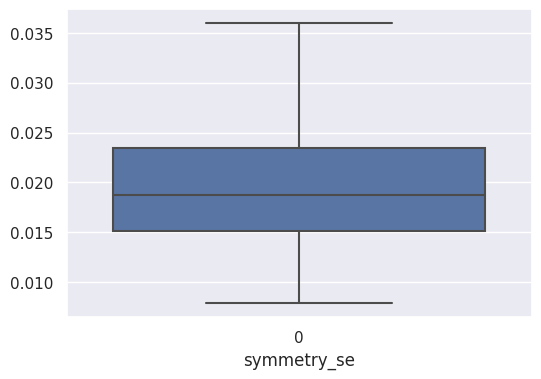

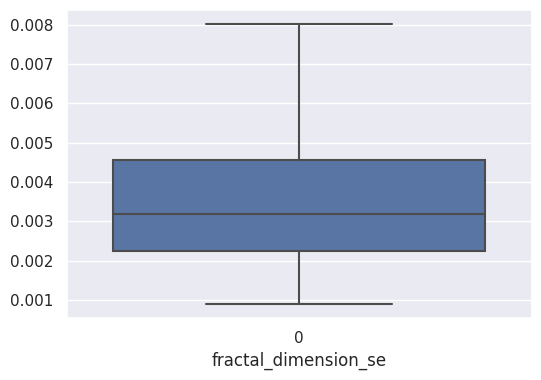

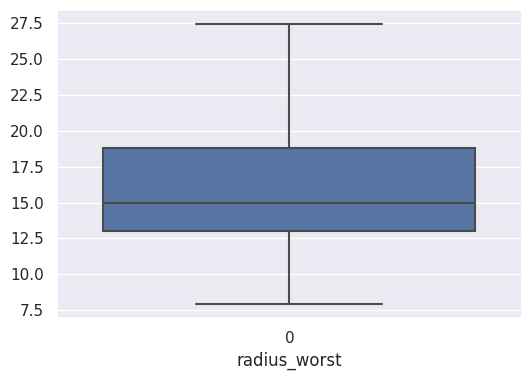

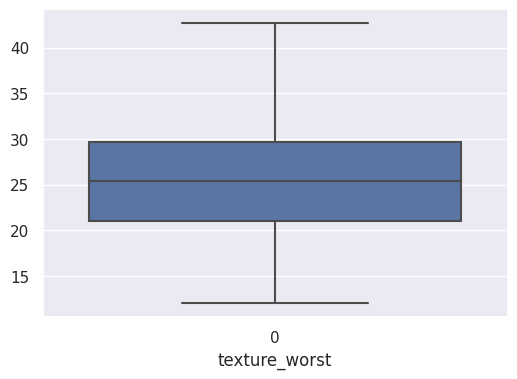

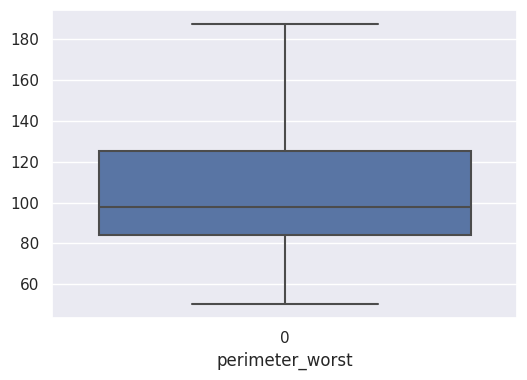

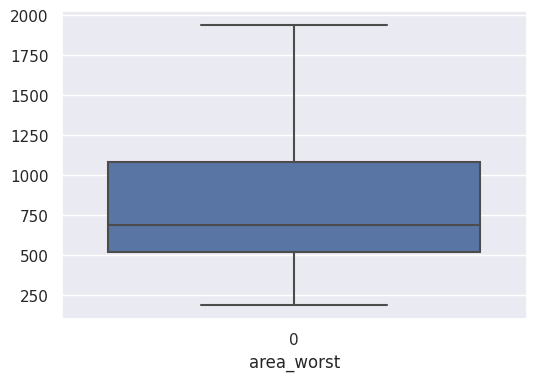

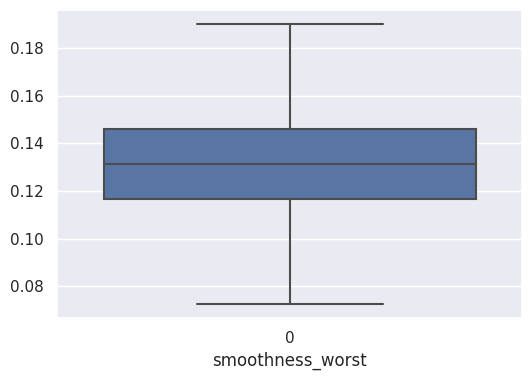

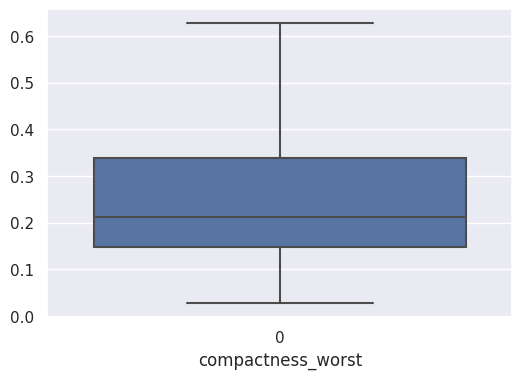

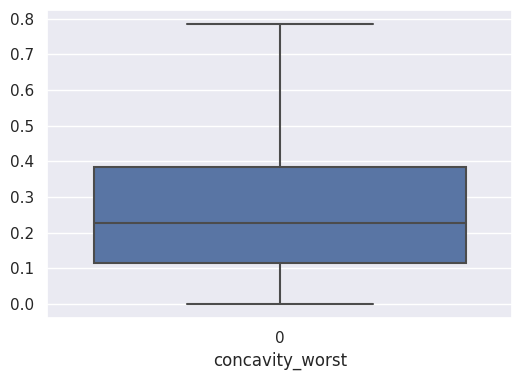

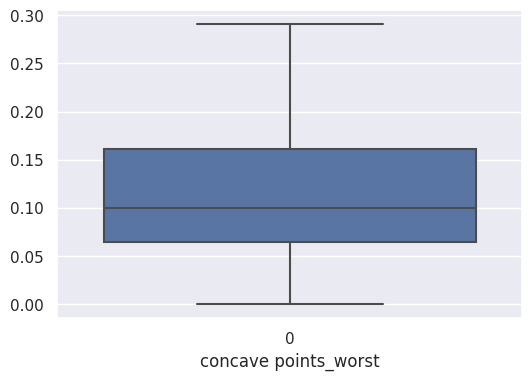

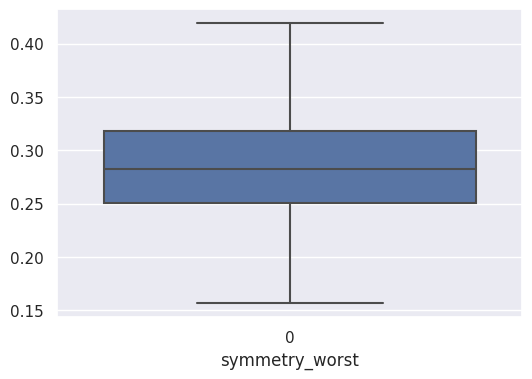

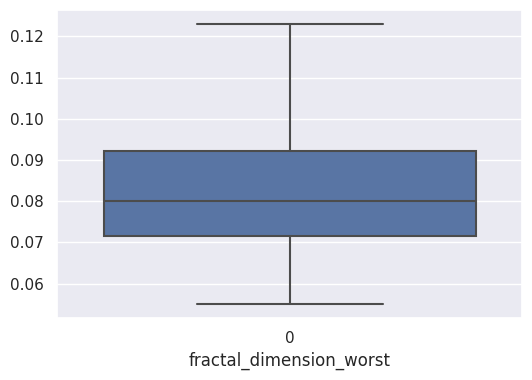

In [45]:
for i in num_cols.columns:
    sns.boxplot(df[i])
    plt.xlabel(i)
    plt.show()

#### Convert Categorical Data to Numerical 

In [46]:
le = LabelEncoder()
Label = ["diagnosis"]
for i in Label:
    df[i] = le.fit_transform(df[i])
    df.shape

In [47]:
df.head()

id  diagnosis  radius_mean  texture_mean  perimeter_mean  \
0    842302.0          1        17.99         10.38          122.80   
1    842517.0          1        20.57         17.77          132.90   
2  20728995.5          1        19.69         21.25          130.00   
3  20728995.5          1        11.42         20.38           77.58   
4  20728995.5          1        20.29         14.34          135.10   

   area_mean  smoothness_mean  compactness_mean  concavity_mean  \
0     1001.0         0.118400           0.22862         0.28241   
1     1326.0         0.084740           0.07864         0.08690   
2     1203.0         0.109600           0.15990         0.19740   
3      386.1         0.133695           0.22862         0.24140   
4     1297.0         0.100300           0.13280         0.19800   

   concave points_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0              0.14710  ...         25.38          17.33           184.60   
1              0.07017  ...         24.99          23.41           158.80   
2              0.12790  ...         23.57          25.53           152.50   
3              0.10520  ...         14.91          26.50            98.87   
4              0.10430  ...         22.54          16.67           152.20   

   area_worst  smoothness_worst  compactness_worst  concavity_worst  \
0     1937.05            0.1622            0.62695           0.7119   
1     1937.05            0.1238            0.18660           0.2416   
2     1709.00            0.1444            0.42450           0.4504   
3      567.70            0.1901            0.62695           0.6869   
4     1575.00            0.1374            0.20500           0.4000   

   concave points_worst  symmetry_worst  fractal_dimension_worst  
0                0.2654         0.41915                  0.11890  
1                0.1860         0.27500                  0.08902  
2                0.2430         0.36130                  0.08758  
3                0.2575         0.41915                  0.12301  
4                0.1625         0.23640                  0.07678  

[5 rows x 32 columns]

#### Bivariate Analysis 

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    float64
 1   diagnosis                569 non-null    int64  
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

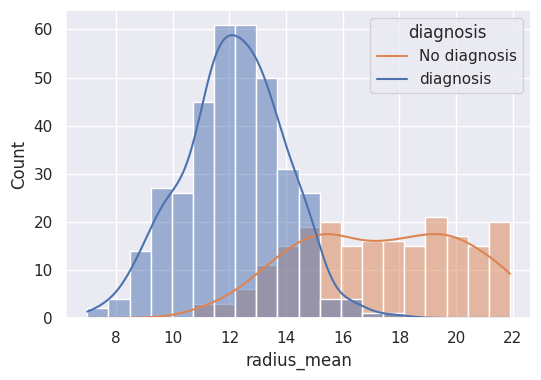

In [49]:
sns.histplot(data=df, x="radius_mean", hue='diagnosis', kde=True, bins=20)
plt.xlabel("radius_mean")
plt.ylabel('Count')
plt.legend(title='diagnosis', loc='upper right', labels=['No diagnosis','diagnosis'])
plt.show()

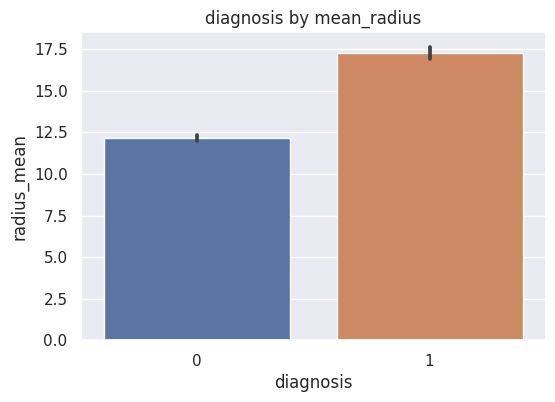

In [50]:
plt.figure(figsize=(6,4))
sns.barplot(x = 'diagnosis',y = 'radius_mean', data=df)
plt.title("diagnosis by mean_radius")
plt.show()

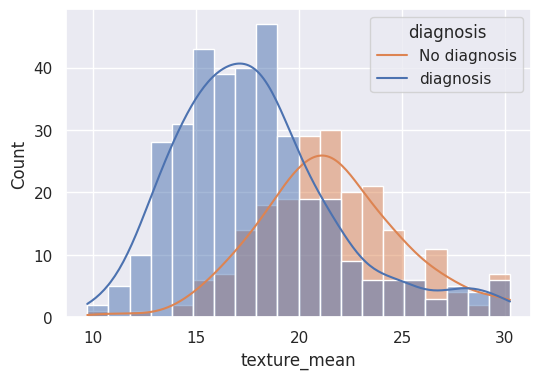

In [51]:
sns.histplot(data=df, x="texture_mean", hue='diagnosis', kde=True, bins=20)
plt.xlabel("texture_mean")
plt.ylabel('Count')
plt.legend(title='diagnosis', loc='upper right', labels=['No diagnosis','diagnosis'])
plt.show()


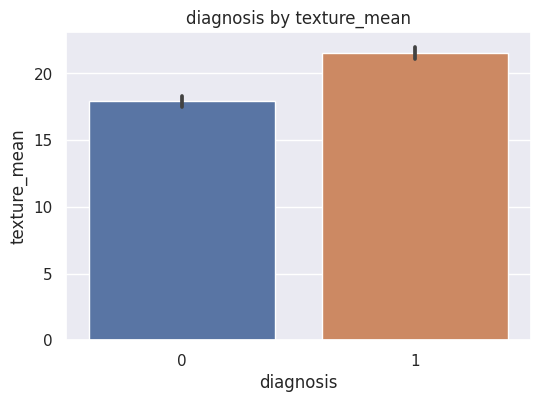

In [52]:
plt.figure(figsize=(6,4))
sns.barplot(x = 'diagnosis',y = 'texture_mean', data=df)
plt.title("diagnosis by texture_mean")
plt.show()

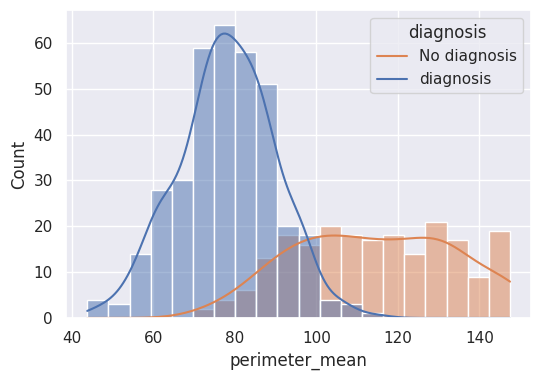

In [53]:
sns.histplot(data=df, x="perimeter_mean", hue='diagnosis', kde=True, bins=20)
plt.xlabel("perimeter_mean")
plt.ylabel('Count')
plt.legend(title='diagnosis', loc='upper right', labels=['No diagnosis','diagnosis'])
plt.show()

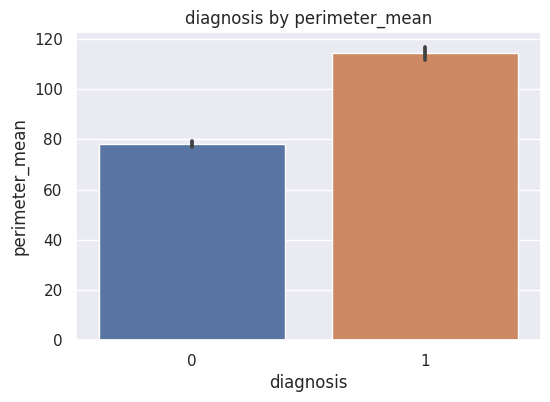

In [54]:
plt.figure(figsize=(6,4))
sns.barplot(x = 'diagnosis',y = 'perimeter_mean', data=df)
plt.title("diagnosis by perimeter_mean")
plt.show()


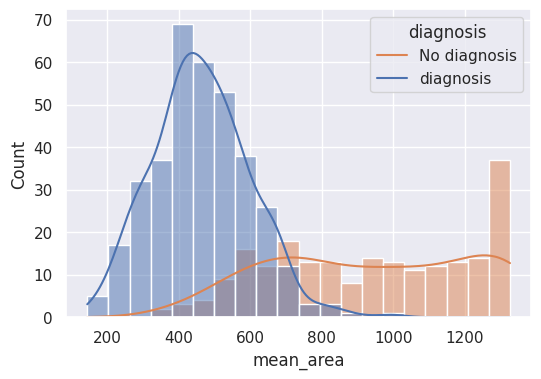

In [55]:
sns.histplot(data=df, x="area_mean", hue='diagnosis', kde=True, bins=20)
plt.xlabel("mean_area")
plt.ylabel('Count')
plt.legend(title='diagnosis', loc='upper right', labels=['No diagnosis','diagnosis'])
plt.show()


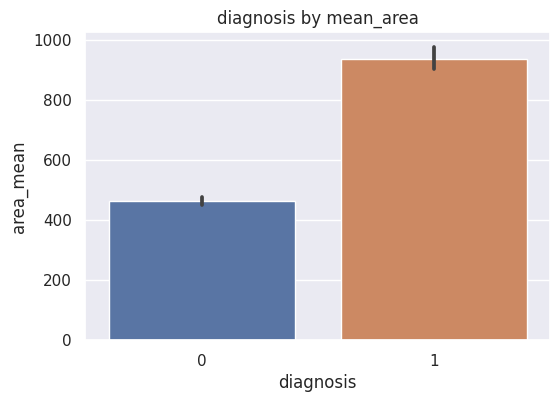

In [56]:
plt.figure(figsize=(6,4))
sns.barplot(x = 'diagnosis',y = 'area_mean', data=df)
plt.title("diagnosis by mean_area")
plt.show()

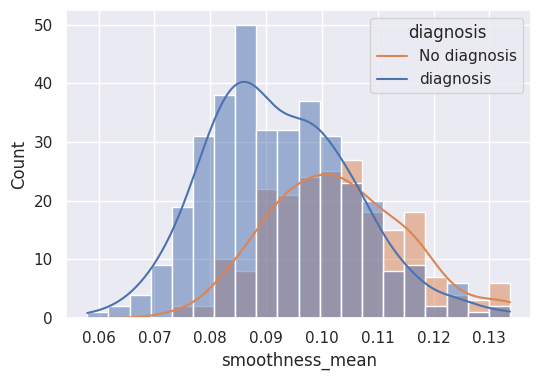

In [57]:
sns.histplot(data=df, x="smoothness_mean", hue='diagnosis', kde=True, bins=20)
plt.xlabel("smoothness_mean")
plt.ylabel('Count')
plt.legend(title='diagnosis', loc='upper right', labels=['No diagnosis','diagnosis'])
plt.show()


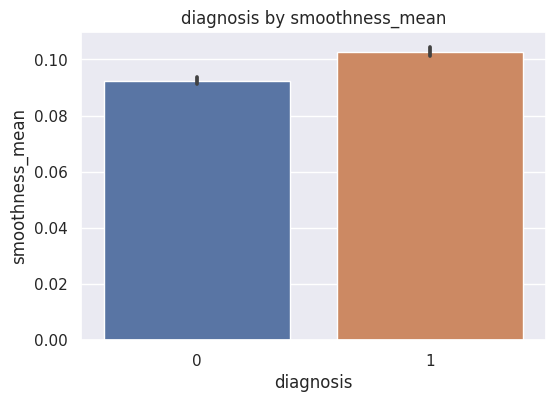

In [58]:
plt.figure(figsize=(6,4))
sns.barplot(x = 'diagnosis',y = 'smoothness_mean', data=df)
plt.title("diagnosis by smoothness_mean")
plt.show()

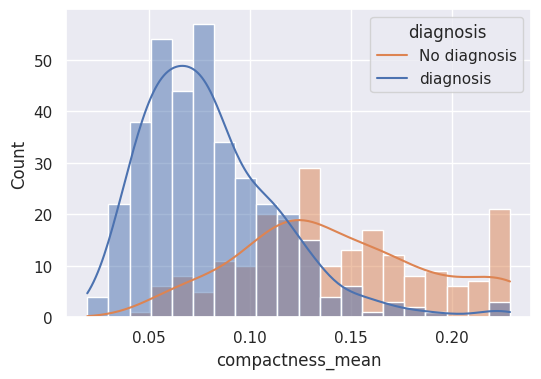

In [59]:
sns.histplot(data=df, x="compactness_mean", hue='diagnosis', kde=True, bins=20)
plt.xlabel("compactness_mean")
plt.ylabel('Count')
plt.legend(title='diagnosis', loc='upper right', labels=['No diagnosis','diagnosis'])
plt.show()

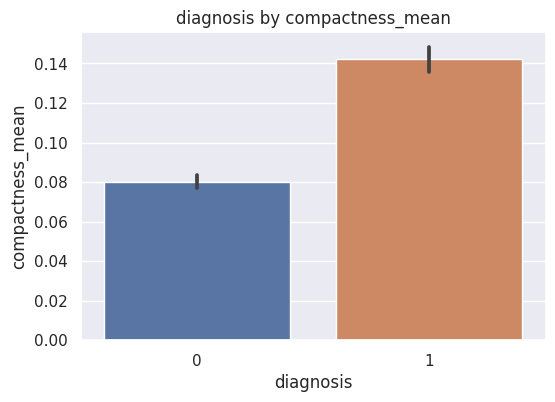

In [60]:
plt.figure(figsize=(6,4))
sns.barplot(x = 'diagnosis',y = 'compactness_mean', data=df)
plt.title("diagnosis by compactness_mean")
plt.show()

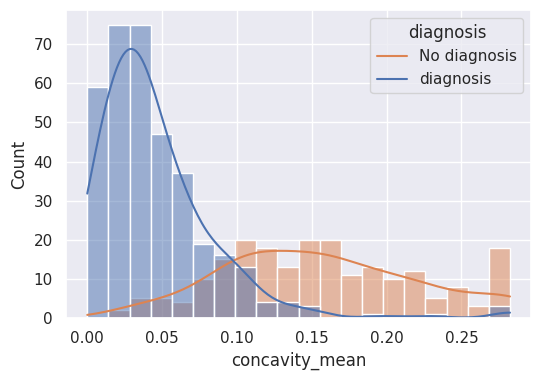

In [61]:
sns.histplot(data=df, x="concavity_mean", hue='diagnosis', kde=True, bins=20)
plt.xlabel("concavity_mean")
plt.ylabel('Count')
plt.legend(title='diagnosis', loc='upper right', labels=['No diagnosis','diagnosis'])
plt.show()

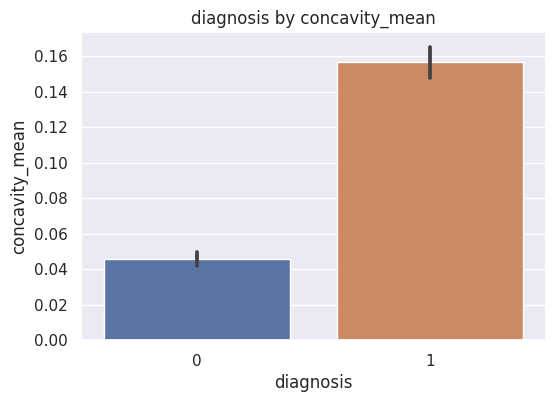

In [62]:
plt.figure(figsize=(6,4))
sns.barplot(x = 'diagnosis',y = 'concavity_mean', data=df)
plt.title("diagnosis by concavity_mean")
plt.show()

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    float64
 1   diagnosis                569 non-null    int64  
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

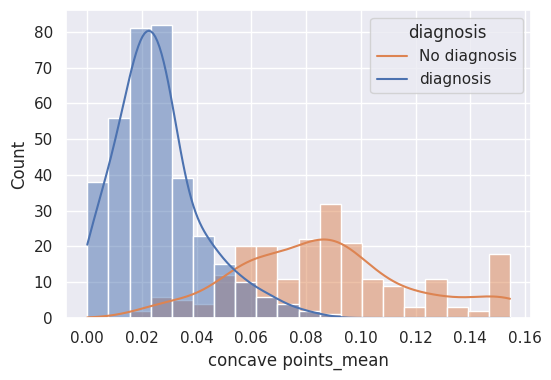

In [64]:
sns.histplot(data=df, x="concave points_mean", hue='diagnosis', kde=True,bins=20)
plt.xlabel("concave points_mean")
plt.ylabel('Count')
plt.legend(title='diagnosis', loc='upper right', labels=['No diagnosis','diagnosis'])
plt.show()

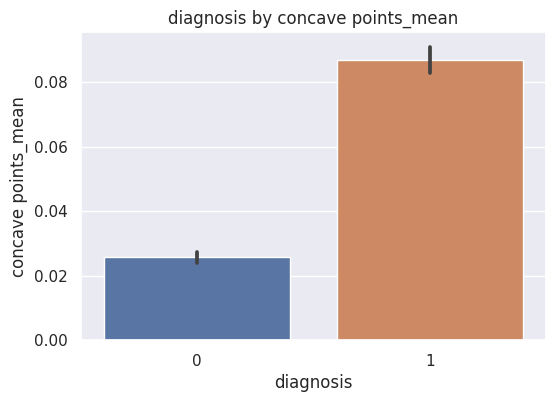

In [65]:
plt.figure(figsize=(6,4))
sns.barplot(x = 'diagnosis',y = 'concave points_mean', data=df)
plt.title("diagnosis by concave points_mean")
plt.show()

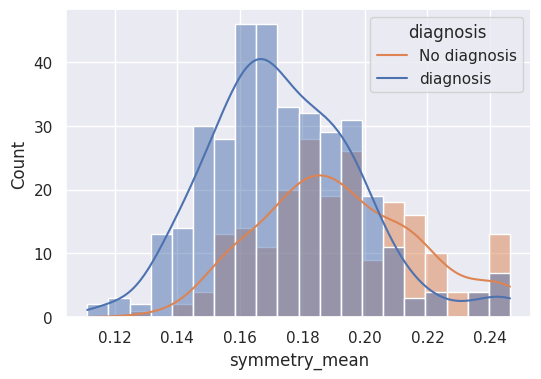

In [66]:
sns.histplot(data=df, x="symmetry_mean", hue='diagnosis', kde=True, bins=20)
plt.xlabel("symmetry_mean")
plt.ylabel('Count')
plt.legend(title='diagnosis', loc='upper right', labels=['No diagnosis','diagnosis'])
plt.show()

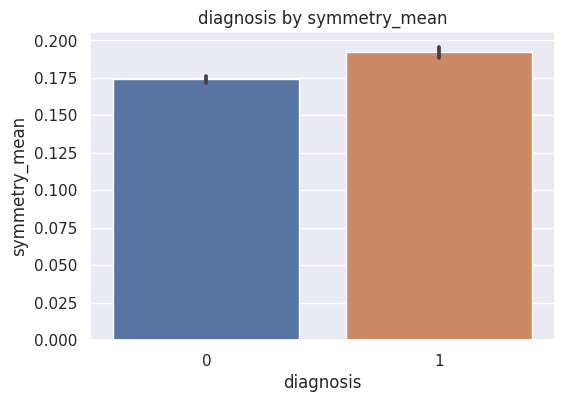

In [67]:
plt.figure(figsize=(6,4))
sns.barplot(x = 'diagnosis',y = 'symmetry_mean', data=df)
plt.title("diagnosis by symmetry_mean")
plt.show()

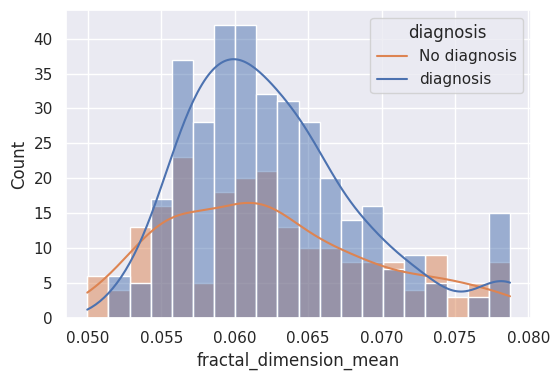

In [68]:
sns.histplot(data=df, x="fractal_dimension_mean", hue='diagnosis', kde=True,bins=20)
plt.xlabel("fractal_dimension_mean")
plt.ylabel('Count')
plt.legend(title='diagnosis', loc='upper right', labels=['No diagnosis','diagnosis'])
plt.show()


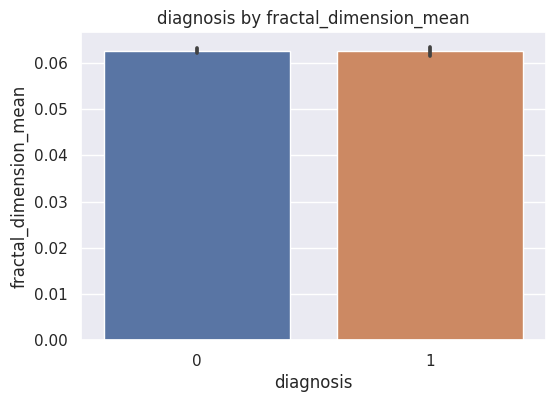

In [69]:
plt.figure(figsize=(6,4))
sns.barplot(x = 'diagnosis',y = 'fractal_dimension_mean', data=df)
plt.title("diagnosis by fractal_dimension_mean")
plt.show()

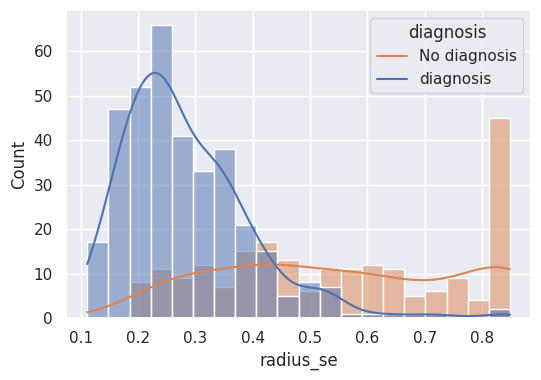

In [70]:
sns.histplot(data=df, x="radius_se", hue='diagnosis', kde=True, bins=20)
plt.xlabel("radius_se")
plt.ylabel('Count')
plt.legend(title='diagnosis', loc='upper right', labels=['No diagnosis','diagnosis'])
plt.show()

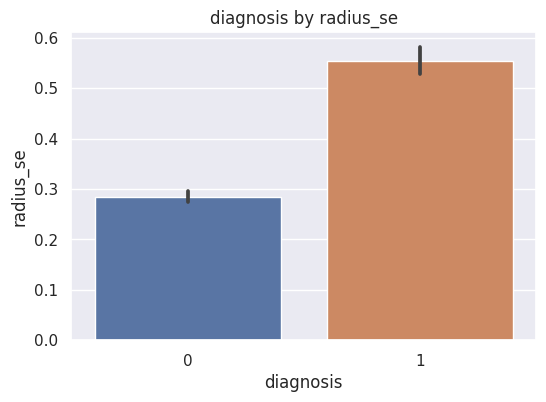

In [71]:
plt.figure(figsize=(6,4))
sns.barplot(x = 'diagnosis',y = 'radius_se', data=df)
plt.title("diagnosis by radius_se")
plt.show()

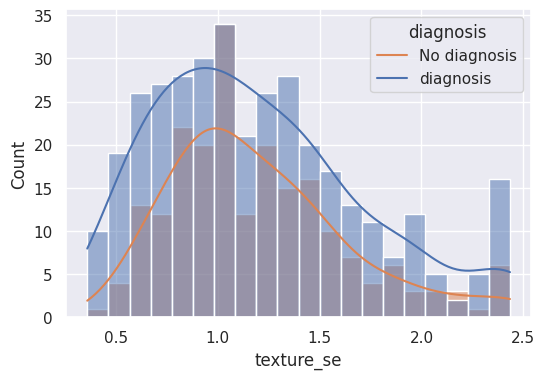

In [72]:
sns.histplot(data=df, x="texture_se", hue='diagnosis', kde=True, bins=20)
plt.xlabel("texture_se")
plt.ylabel('Count')
plt.legend(title='diagnosis', loc='upper right', labels=['No diagnosis','diagnosis'])
plt.show()


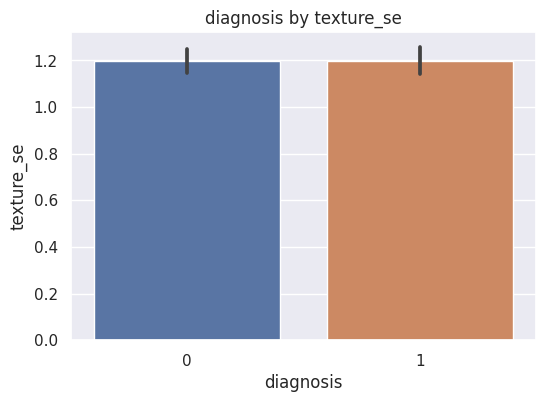

In [73]:
plt.figure(figsize=(6,4))
sns.barplot(x = 'diagnosis',y = 'texture_se', data=df)
plt.title("diagnosis by texture_se")
plt.show()

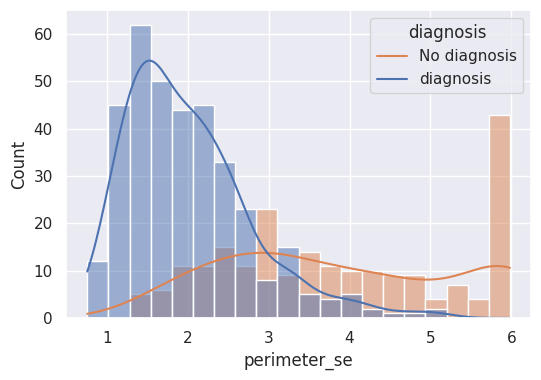

In [74]:
sns.histplot(data=df, x="perimeter_se", hue='diagnosis', kde=True, bins=20)
plt.xlabel("perimeter_se")
plt.ylabel('Count')
plt.legend(title='diagnosis', loc='upper right', labels=['No diagnosis','diagnosis'])
plt.show()


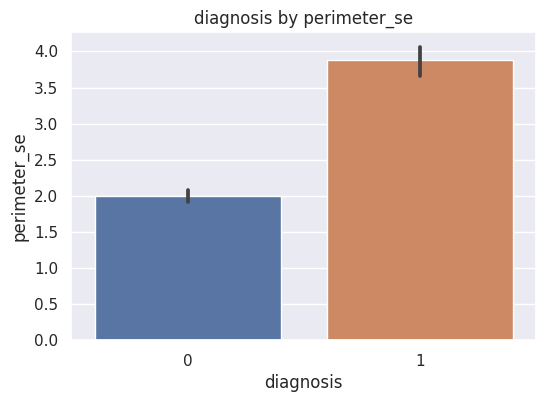

In [75]:
plt.figure(figsize=(6,4))
sns.barplot(x = 'diagnosis',y = 'perimeter_se', data=df)
plt.title("diagnosis by perimeter_se")
plt.show()

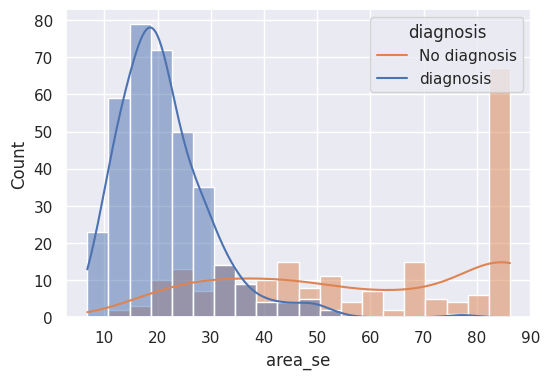

In [76]:
sns.histplot(data=df, x="area_se", hue='diagnosis', kde=True, bins=20)
plt.xlabel("area_se")
plt.ylabel('Count')
plt.legend(title='diagnosis', loc='upper right', labels=['No diagnosis','diagnosis'])
plt.show()

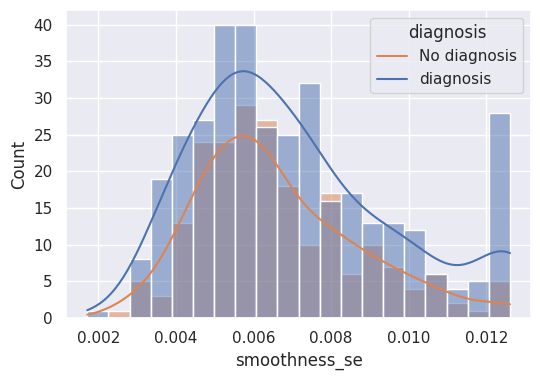

In [77]:
sns.histplot(data=df, x="smoothness_se", hue='diagnosis', kde=True, bins=20)
plt.xlabel("smoothness_se")
plt.ylabel('Count')
plt.legend(title='diagnosis', loc='upper right', labels=['No diagnosis','diagnosis'])
plt.show()


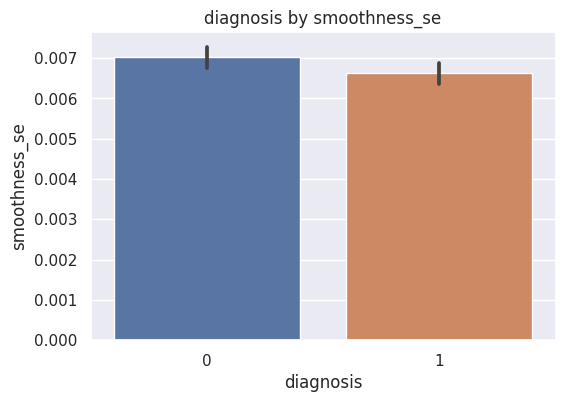

In [78]:
plt.figure(figsize=(6,4))
sns.barplot(x = 'diagnosis',y = 'smoothness_se', data=df)
plt.title("diagnosis by smoothness_se")
plt.show()

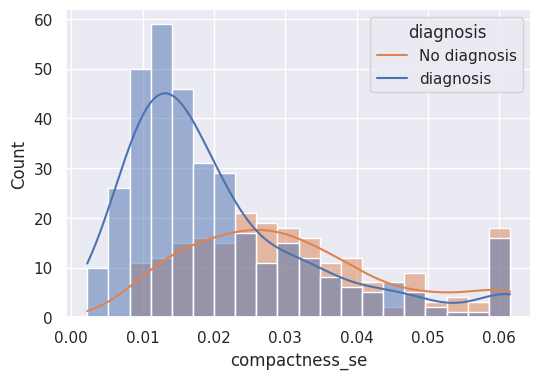

In [79]:
sns.histplot(data=df, x="compactness_se", hue='diagnosis', kde=True, bins=20)
plt.xlabel("compactness_se")
plt.ylabel('Count')
plt.legend(title='diagnosis', loc='upper right', labels=['No diagnosis','diagnosis'])
plt.show()


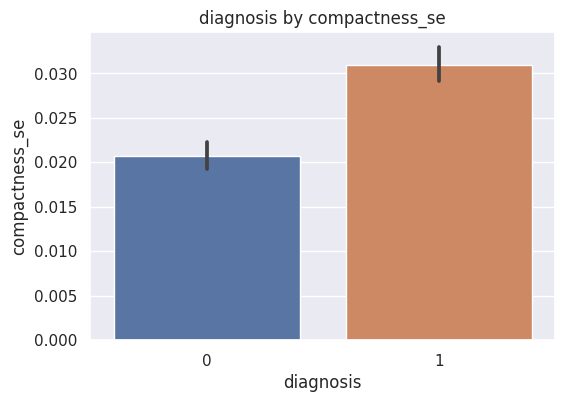

In [80]:
plt.figure(figsize=(6,4))
sns.barplot(x = 'diagnosis',y = 'compactness_se', data=df)
plt.title("diagnosis by compactness_se")
plt.show()

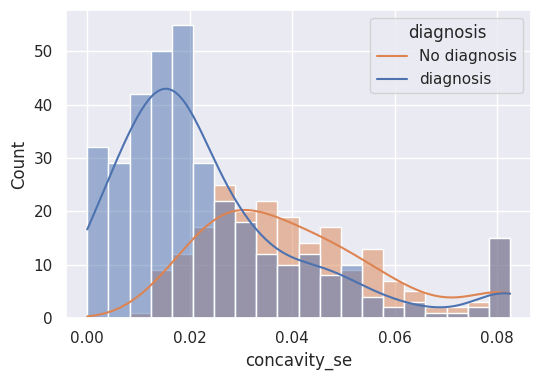

In [81]:
 sns.histplot(data=df, x="concavity_se", hue='diagnosis', kde=True, bins=20)
plt.xlabel("concavity_se")
plt.ylabel('Count')
plt.legend(title='diagnosis', loc='upper right', labels=['No diagnosis','diagnosis'])
plt.show()


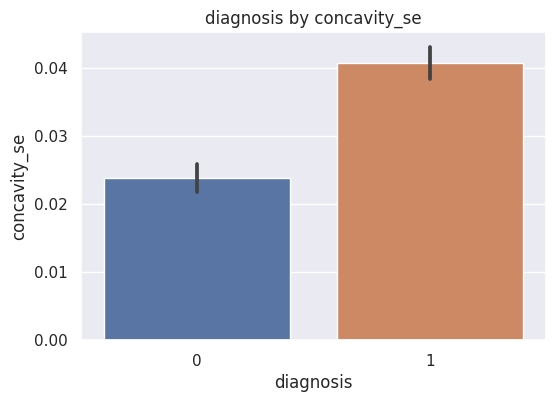

In [82]:
plt.figure(figsize=(6,4))
sns.barplot(x = 'diagnosis',y = 'concavity_se', data=df)
plt.title("diagnosis by concavity_se")
plt.show()


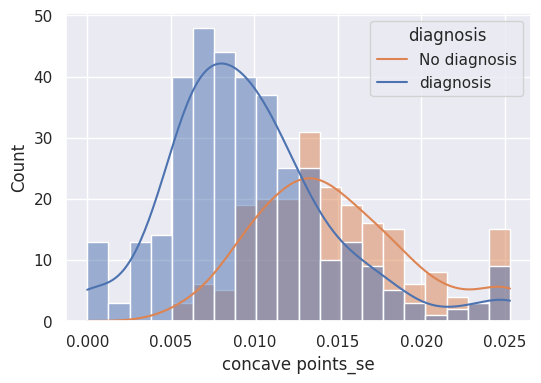

In [83]:
sns.histplot(data=df, x="concave points_se", hue='diagnosis', kde=True, bins=20)
plt.xlabel("concave points_se")
plt.ylabel('Count')
plt.legend(title='diagnosis', loc='upper right', labels=['No diagnosis','diagnosis'])
plt.show()


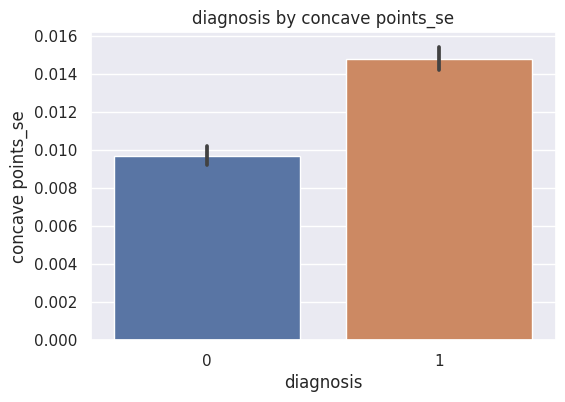

In [84]:
plt.figure(figsize=(6,4))
sns.barplot(x = 'diagnosis',y = 'concave points_se', data=df)
plt.title("diagnosis by concave points_se")
plt.show()

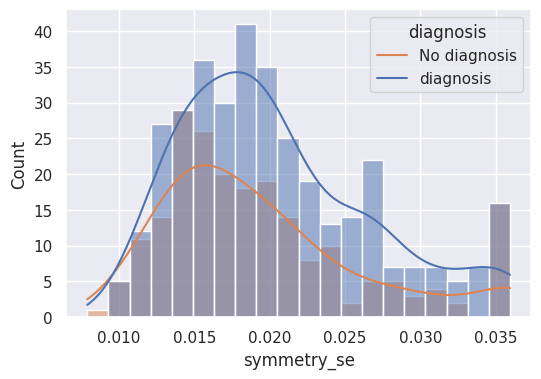

In [85]:
 sns.histplot(data=df, x="symmetry_se", hue='diagnosis', kde=True, bins=20)
plt.xlabel("symmetry_se")
plt.ylabel('Count')
plt.legend(title='diagnosis', loc='upper right', labels=['No diagnosis','diagnosis'])
plt.show()

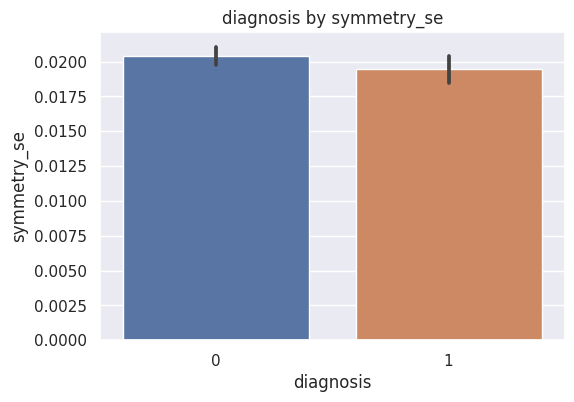

In [86]:
plt.figure(figsize=(6,4))
sns.barplot(x = 'diagnosis',y = 'symmetry_se', data=df)
plt.title("diagnosis by symmetry_se")
plt.show()

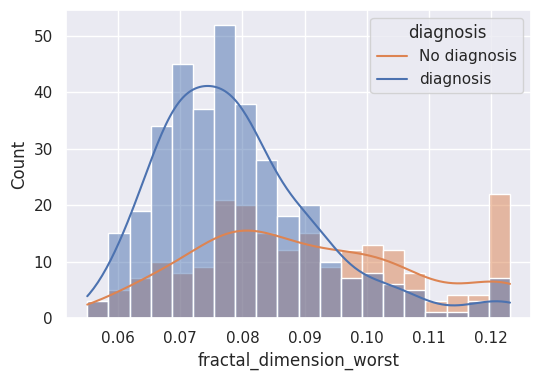

In [87]:
sns.histplot(data=df, x="fractal_dimension_worst", hue='diagnosis', kde=True,bins=20)
plt.xlabel("fractal_dimension_worst")
plt.ylabel('Count')
plt.legend(title='diagnosis', loc='upper right', labels=['No diagnosis','diagnosis'])
plt.show()

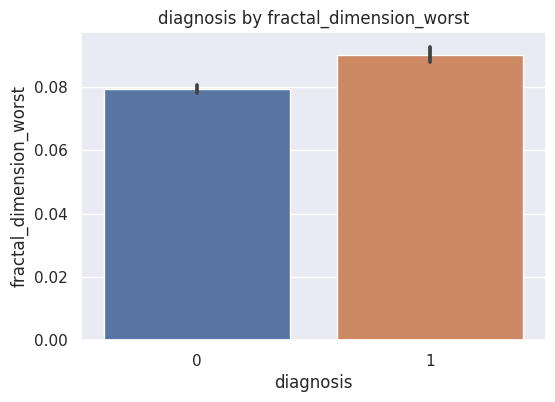

In [88]:
plt.figure(figsize=(6,4))
sns.barplot(x = 'diagnosis',y = 'fractal_dimension_worst', data=df)
plt.title("diagnosis by fractal_dimension_worst")
plt.show()

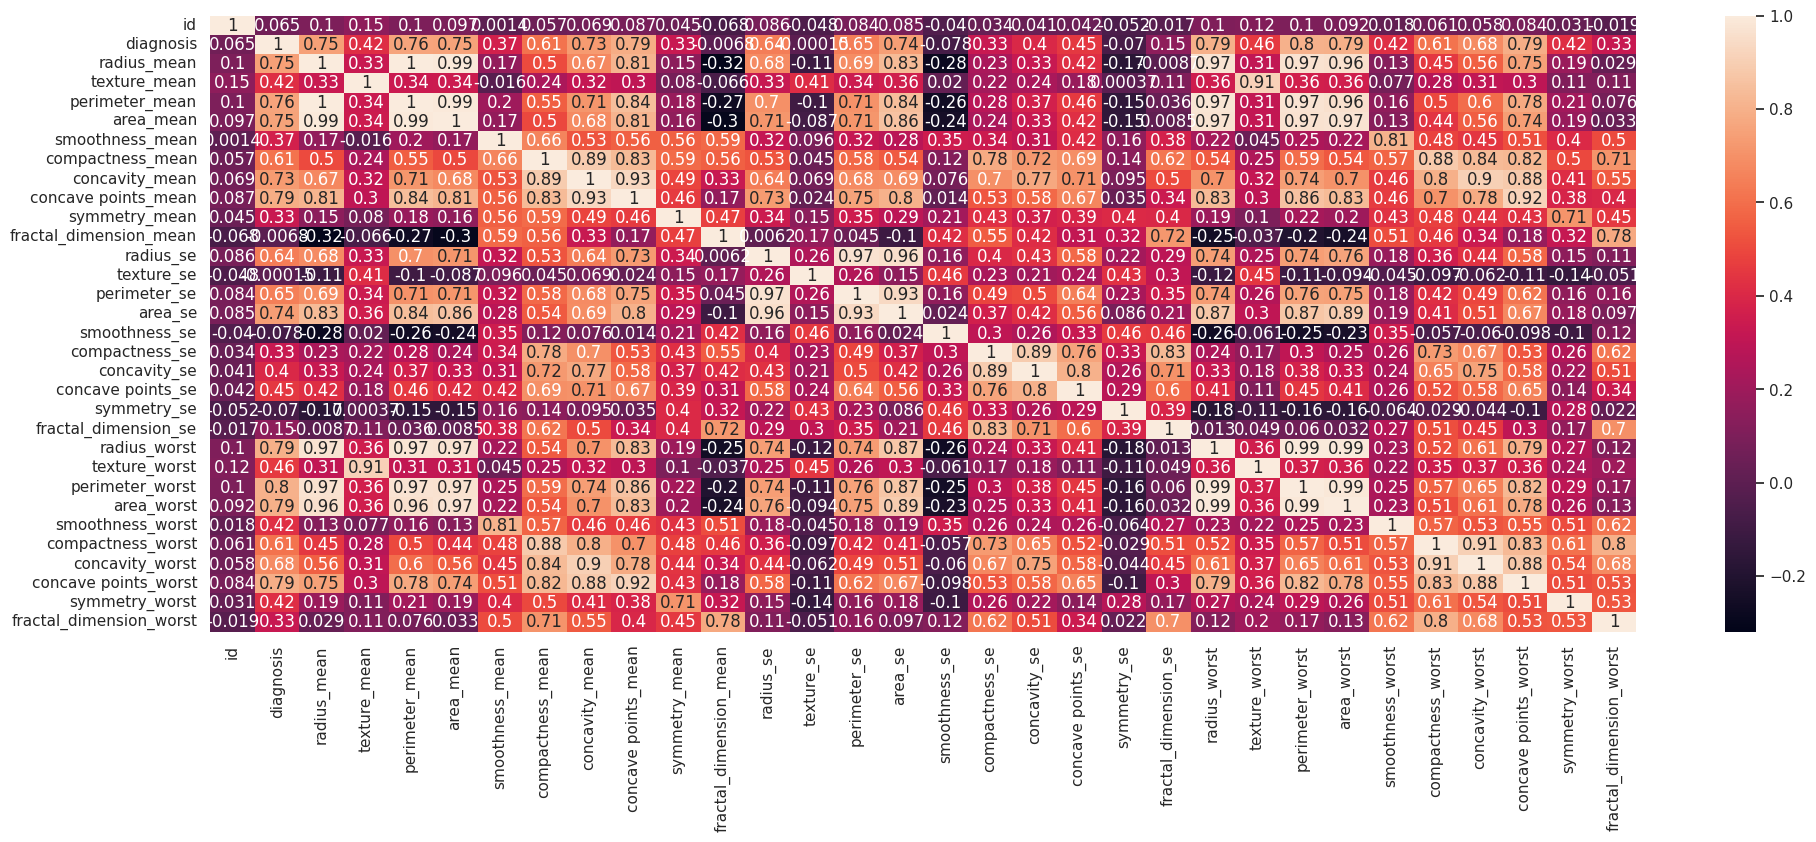

In [89]:
plt.figure(figsize=(23,8))
sns.heatmap(df.corr(), annot=True)
plt.show()

In [90]:
def plots(df, variable):
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    sns.distplot(df[variable], kde=True, bins=10)
    plt.title(variable)
    plt.subplot(1, 2, 2)
    stats.probplot(df[variable], dist="norm", plot=pylab)
    plt.title(variable)
    plt.show()
    for i in df.columns:
        plots(df, i)


## Feature Engineering

In [91]:
X = df.iloc[:,2:]
Y = df["diagnosis"]

In [92]:
X.head()

radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
0        17.99         10.38          122.80     1001.0         0.118400   
1        20.57         17.77          132.90     1326.0         0.084740   
2        19.69         21.25          130.00     1203.0         0.109600   
3        11.42         20.38           77.58      386.1         0.133695   
4        20.29         14.34          135.10     1297.0         0.100300   

   compactness_mean  concavity_mean  concave points_mean  symmetry_mean  \
0           0.22862         0.28241              0.14710         0.2419   
1           0.07864         0.08690              0.07017         0.1812   
2           0.15990         0.19740              0.12790         0.2069   
3           0.22862         0.24140              0.10520         0.2464   
4           0.13280         0.19800              0.10430         0.1809   

   fractal_dimension_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0                 0.07871  ...         25.38          17.33           184.60   
1                 0.05667  ...         24.99          23.41           158.80   
2                 0.05999  ...         23.57          25.53           152.50   
3                 0.07875  ...         14.91          26.50            98.87   
4                 0.05883  ...         22.54          16.67           152.20   

   area_worst  smoothness_worst  compactness_worst  concavity_worst  \
0     1937.05            0.1622            0.62695           0.7119   
1     1937.05            0.1238            0.18660           0.2416   
2     1709.00            0.1444            0.42450           0.4504   
3      567.70            0.1901            0.62695           0.6869   
4     1575.00            0.1374            0.20500           0.4000   

   concave points_worst  symmetry_worst  fractal_dimension_worst  
0                0.2654         0.41915                  0.11890  
1                0.1860         0.27500                  0.08902  
2                0.2430         0.36130                  0.08758  
3                0.2575         0.41915                  0.12301  
4                0.1625         0.23640                  0.07678  

[5 rows x 30 columns]

In [93]:
Y

0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: diagnosis, Length: 569, dtype: int64

In [94]:
mi_score = mutual_info_classif(X,Y)
mi_score = pd.Series(mi_score)
mi_score.index = X.columns
mi_score.sort_values(ascending=True)

texture_se                 0.000000
fractal_dimension_mean     0.000970
symmetry_se                0.001684
smoothness_se              0.012499
fractal_dimension_se       0.040369
symmetry_mean              0.060974
fractal_dimension_worst    0.066393
compactness_se             0.074212
smoothness_mean            0.079992
symmetry_worst             0.087631
texture_mean               0.100104
smoothness_worst           0.100789
texture_worst              0.120449
concavity_se               0.120982
concave points_se          0.126842
compactness_mean           0.211542
compactness_worst          0.222904
radius_se                  0.247067
perimeter_se               0.277317
concavity_worst            0.319371
area_se                    0.339596
area_mean                  0.359243
radius_mean                0.368814
concavity_mean             0.371428
perimeter_mean             0.402475
concave points_worst       0.437322
concave points_mean        0.440917
radius_worst               0

<Axes: >

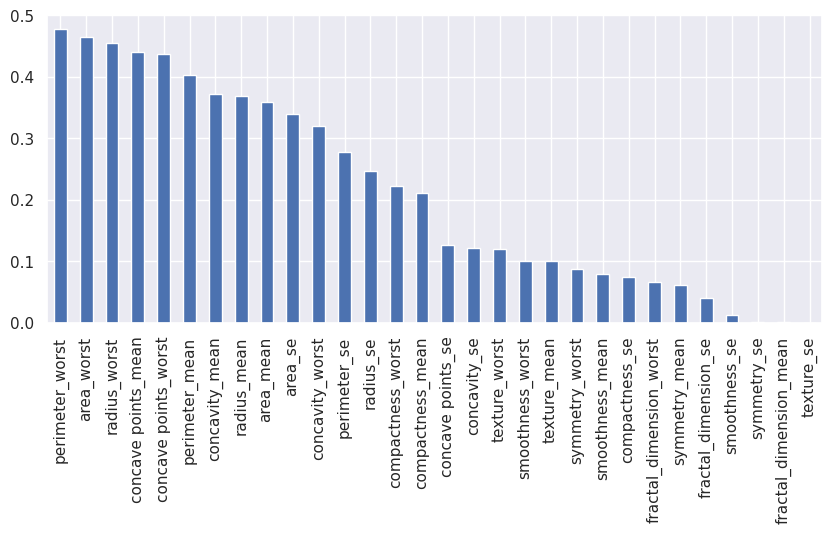

In [95]:
 mi_score.sort_values(ascending=False).plot.bar(figsize=(10, 4))

# Spliting Data into Train and Test

In [96]:
train_data,test_data,train_label,test_label = train_test_split(X, Y,test_size=0.2, random_state=0)


In [97]:
print("train_data : ",train_data.shape)
print("train_label : ",train_label.shape)
print("test_data : ",test_data.shape)
print("test_label : ",test_label.shape)


train_data :  (455, 30)
train_label :  (455,)
test_data :  (114, 30)
test_label :  (114,)


In [98]:
sc = StandardScaler()
train_data_sc = sc.fit_transform(train_data)
test_data_sc = sc.fit_transform(test_data)

In [99]:
train_data_sc

array([[-1.20613843, -0.39169595, -1.18254687, ..., -0.75798367,
         0.03044858, -0.40110101],
       [-0.9790112 ,  0.69777576, -0.98991351, ..., -0.60687023,
         0.16113029, -0.40238282],
       [ 0.63813467, -1.04537898,  0.57182403, ..., -0.02371948,
        -0.18305958, -0.81896974],
       ...,
       [-1.39207993, -0.19828412, -1.38441607, ..., -0.97974953,
        -0.77940995, -0.09859482],
       [-1.30607441, -0.22276663, -1.34439407, ..., -1.75401433,
        -1.78253018, -1.10929878],
       [-0.76399743,  1.17518471, -0.73790686, ..., -0.27460457,
        -1.4088909 ,  0.28338334]])

In [100]:
pc = PCA()
train_data_sc_pc = pc.fit_transform(train_data_sc)
test_data_sc_pc = pc.fit_transform(test_data_sc)

In [101]:
explained_variance = pc.explained_variance_ratio_
print("Explained Variance Ratios:", explained_variance)

Explained Variance Ratios: [4.95858431e-01 1.68719119e-01 9.39835350e-02 6.09320820e-02
 5.43182855e-02 3.45770153e-02 2.16055359e-02 1.70255584e-02
 1.19157813e-02 8.82234309e-03 7.62759529e-03 5.51307915e-03
 4.73116833e-03 3.65771435e-03 2.34974883e-03 1.57601065e-03
 1.49289130e-03 1.01374489e-03 8.90380427e-04 7.69010273e-04
 6.31900857e-04 4.80117927e-04 4.32621151e-04 3.47253270e-04
 2.73492668e-04 2.08025134e-04 1.63687394e-04 5.48885740e-05
 2.32924386e-05 5.69088715e-06]


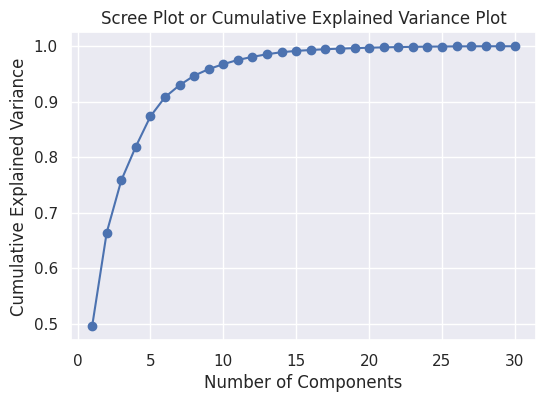

In [102]:
# calculate cumulative sum of explained variance ratio
cumulative_variance = np.cumsum(explained_variance)
# plot the scree plot or cumulative explained variance plot
plt.plot(range(1, len(explained_variance) + 1), cumulative_variance,marker='o', linestyle='-')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Scree Plot or Cumulative Explained Variance Plot')
plt.grid(True)
plt.show()


In [103]:
# Cumulative explained variance nikalen
cumulative_variance = np.cumsum(explained_variance)
# Kitne components select karna hai, yeh decide karen
desired_variance = 0.95 # Example: 95% variance ko capture karna hai
# Kitne components select kiye ja sakte hain
num_components = np.argmax(cumulative_variance >= desired_variance) + 1
print(f"\nNumber of components selected: {num_components}")



Number of components selected: 9


In [104]:
pc = PCA(n_components=9)
train_data_sc = pc.fit_transform(train_data_sc)
test_data_sc = pc.fit_transform(test_data_sc)

In [105]:
explained_variance = pc.explained_variance_ratio_
print("Explained Variance Ratios:", explained_variance)

Explained Variance Ratios: [0.49585843 0.16871912 0.09398354 0.06093208 0.05431829 0.03457702
 0.02160554 0.01702556 0.01191578]


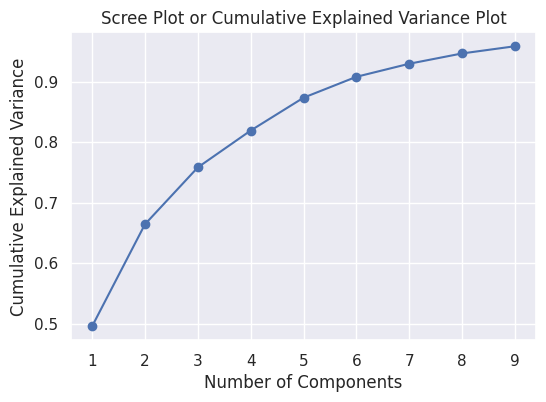

In [106]:
# calculate cumulative sum of explained variance ratio
cumulative_variance = np.cumsum(explained_variance)
# plot the scree plot or cumulative explained variance plot
plt.plot(range(1, len(explained_variance) + 1), cumulative_variance,marker='o', linestyle='-')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Scree Plot or Cumulative Explained Variance Plot')
plt.grid(True)
plt.show()


In [107]:
train_data_sc.shape

(455, 9)

##  Model

In [108]:
accuracy_results = {}

In [109]:
model_lr = LogisticRegression().fit(train_data_sc,train_label)

In [110]:
y_pred = model_lr.predict(test_data_sc)
y_pred

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 1, 0])

In [111]:
print("Accuracy Score : ",accuracy_score(y_pred,test_label))

Accuracy Score :  0.9473684210526315


In [112]:
confusion_matrix(y_pred,test_label)

array([[64,  3],
       [ 3, 44]])

In [113]:
print(classification_report(y_pred,test_label))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96        67
           1       0.94      0.94      0.94        47

    accuracy                           0.95       114
   macro avg       0.95      0.95      0.95       114
weighted avg       0.95      0.95      0.95       114



In [114]:
train_accuracy_lr = cross_val_score(model_lr,train_data_sc,train_label,cv=5).mean()
test_accuracy_lr = cross_val_score(model_lr,test_data_sc,test_label,cv=5).mean()
print(" Train Data Cross_val_score : ",train_accuracy_lr)
print("Test Data Cross_val_score : ",test_accuracy_lr)

 Train Data Cross_val_score :  0.9758241758241757
Test Data Cross_val_score :  0.9557312252964427


In [115]:
accuracy_results["Logistic_Regression_Accuracy"] = train_accuracy_lr

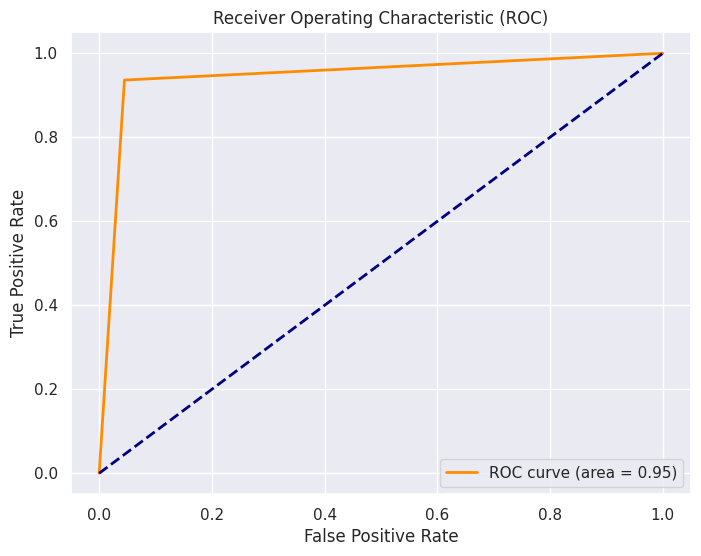

In [116]:
fpr, tpr, thresholds = roc_curve(test_label, y_pred)
# Calculate the Area Under the Curve (AUC)
roc_auc = auc(fpr, tpr)
# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' %roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()


### Random Forest Model

In [117]:
model_rf = RandomForestClassifier(max_depth=5, min_samples_leaf=1,min_samples_split=5, n_estimators=200).fit(train_data_sc,train_label)


In [118]:
y_pred_2 = model_rf.predict(test_data_sc)
y_pred_2


array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 1, 0])

In [119]:
print("Accuracy Score : ",accuracy_score(y_pred_2,test_label))

Accuracy Score :  0.9385964912280702


In [120]:
confusion_matrix(y_pred_2, test_label)

array([[65,  5],
       [ 2, 42]])

In [121]:
print(classification_report(y_pred_2,test_label))

              precision    recall  f1-score   support

           0       0.97      0.93      0.95        70
           1       0.89      0.95      0.92        44

    accuracy                           0.94       114
   macro avg       0.93      0.94      0.94       114
weighted avg       0.94      0.94      0.94       114



In [122]:
train_accuracy_rf = cross_val_score(model_rf,train_data_sc,train_label,cv=5).mean()
test_accuracy_rf = cross_val_score(model_rf,test_data_sc,test_label,cv=5).mean()
print(" Train Data Cross_val_score : ",train_accuracy_rf)
print("Test Data Cross_val_score : ",test_accuracy_rf)


 Train Data Cross_val_score :  0.9428571428571428
Test Data Cross_val_score :  0.9122529644268773


In [123]:
accuracy_results["Random_Forest_Accuracy"] = train_accuracy_rf

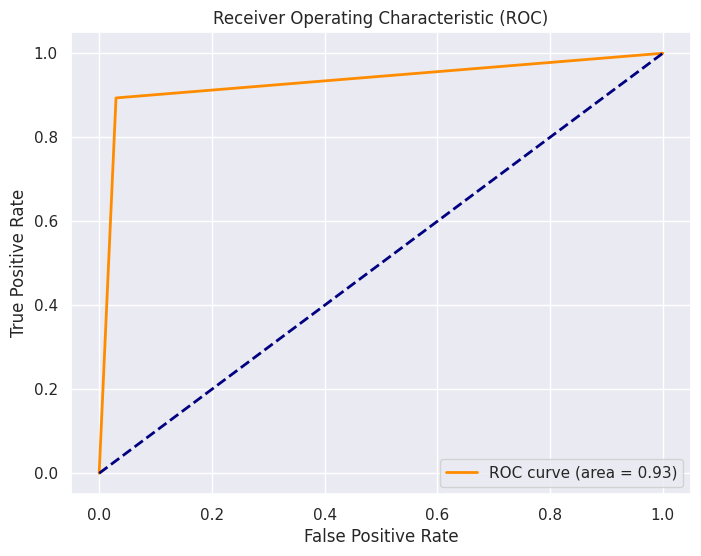

In [124]:
 fpr, tpr, thresholds = roc_curve(test_label, y_pred_2)
# Calculate the Area Under the Curve (AUC)
roc_auc = auc(fpr, tpr)
# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' %roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

In [125]:
 from sklearn.model_selection import GridSearchCV
# Define the hyperparameter grid
param_grid = {
'n_estimators': [50, 100, 200],
'max_depth': [5, 10, 15],
'min_samples_split': [2, 5, 10],
'min_samples_leaf': [1, 2, 4]
}
# Create a Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)
# Create Grid Search
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5,scoring='accuracy', n_jobs=-1)
# Fit the Grid Search to the data
grid_search.fit(train_data_sc, train_label)
# Print the best parameters
print("Best Parameters:", grid_search.best_params_)
# Print the best score
print("Best Score:", grid_search.best_score_)
# Get the best model
best_rf_model = grid_search.best_estimator_


Best Parameters: {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}
Best Score: 0.9494505494505494


### Decision Tree Model

In [126]:
model_tree = DecisionTreeClassifier(max_depth=5, min_samples_leaf=4,min_samples_split=2).fit(train_data_sc,train_label)

In [127]:
y_pred_3 = model_tree.predict(test_data_sc)
y_pred_3

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0])

In [128]:
print("Accuracy Score : ",accuracy_score(y_pred_3,test_label))

Accuracy Score :  0.8771929824561403


In [129]:
confusion_matrix(y_pred_3,test_label)

array([[63, 10],
       [ 4, 37]])

In [130]:
print(classification_report(y_pred_3,test_label))

              precision    recall  f1-score   support

           0       0.94      0.86      0.90        73
           1       0.79      0.90      0.84        41

    accuracy                           0.88       114
   macro avg       0.86      0.88      0.87       114
weighted avg       0.89      0.88      0.88       114



In [131]:
train_accuracy_tree =cross_val_score(model_tree,train_data_sc,train_label,cv=5).mean()
test_accuracy_tree = cross_val_score(model_tree,test_data_sc,test_label,cv=5).mean()
print(" Train Data Cross_val_score : ",train_accuracy_tree)
print("Test Data Cross_val_score : ",test_accuracy_tree)


 Train Data Cross_val_score :  0.9318681318681319
Test Data Cross_val_score :  0.859288537549407


In [132]:
accuracy_results["Decision_Tree_Accuracy"] = train_accuracy_tree

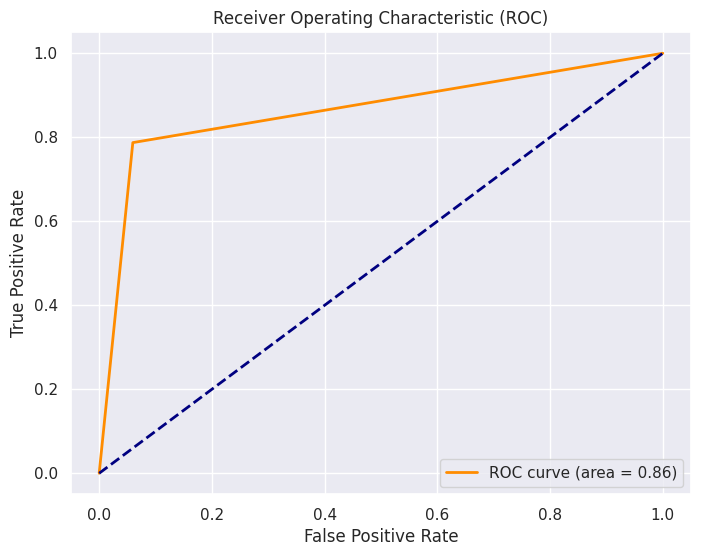

In [133]:
fpr, tpr, thresholds = roc_curve(test_label, y_pred_3)
# Calculate the Area Under the Curve (AUC)
roc_auc = auc(fpr, tpr)
# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' %roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()


In [134]:
from sklearn.model_selection import GridSearchCV
# Define the hyperparameter grid
param_grid = {
'max_depth': [5, 10, 15],
'min_samples_split': [2, 5, 10],
'min_samples_leaf': [1, 2, 4]
}
# Create a Decision Tree Classifier
dt_model = DecisionTreeClassifier(random_state=42)
# Create Grid Search
grid_search = GridSearchCV(estimator=dt_model, param_grid=param_grid, cv=5,scoring='accuracy', n_jobs=-1)
# Fit the Grid Search to the data
grid_search.fit(train_data_sc, train_label)
# Print the best parameters
print("Best Parameters:", grid_search.best_params_)
# Print the best score
print("Best Score:", grid_search.best_score_)
# Get the best model
best_dt_model = grid_search.best_estimator_


Best Parameters: {'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 2}
Best Score: 0.9384615384615385


###   KNN Model

In [135]:
model_knn = KNeighborsClassifier().fit(train_data_sc,train_label)

In [136]:
y_pred_4 = model_knn.predict(test_data_sc)
y_pred_4

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 1, 0])

In [137]:
print("Accuracy Score : ",accuracy_score(y_pred_4,test_label))

Accuracy Score :  0.9736842105263158


In [138]:
confusion_matrix(y_pred_4,test_label)

array([[67,  3],
       [ 0, 44]])

In [139]:
print(classification_report(y_pred_4,test_label))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98        70
           1       0.94      1.00      0.97        44

    accuracy                           0.97       114
   macro avg       0.97      0.98      0.97       114
weighted avg       0.98      0.97      0.97       114



In [140]:
train_accuracy_knn = cross_val_score(model_knn,train_data_sc,train_label,cv=5).mean()
test_accuracy_knn = cross_val_score(model_knn,test_data_sc,test_label,cv=5).mean()
print(" Train Data Cross_val_score : ",train_accuracy_knn)
print("Test Data Cross_val_score : ",test_accuracy_knn)


 Train Data Cross_val_score :  0.9626373626373625
Test Data Cross_val_score :  0.9292490118577075


In [141]:
accuracy_results["KNeighborsClassifier_Accuracy"] = train_accuracy_knn

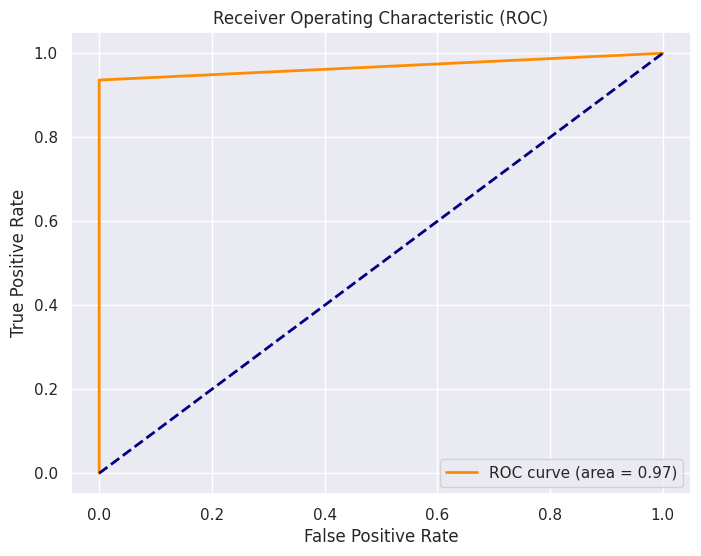

In [142]:
fpr, tpr, thresholds = roc_curve(test_label, y_pred_4)
# Calculate the Area Under the Curve (AUC)
roc_auc = auc(fpr, tpr)
# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' %roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

### XGBOOSt Model

In [143]:
model_xgb = xgb.XGBClassifier().fit(train_data_sc,train_label)

In [144]:
y_pred_5 = model_xgb.predict(test_data_sc)
y_pred_5

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 1, 0])

In [145]:
print("Accuracy Score : ",accuracy_score(y_pred_5,test_label))

Accuracy Score :  0.9473684210526315


In [146]:
confusion_matrix(y_pred_5,test_label)

array([[65,  4],
       [ 2, 43]])

In [147]:
 print(classification_report(y_pred_5,test_label))

              precision    recall  f1-score   support

           0       0.97      0.94      0.96        69
           1       0.91      0.96      0.93        45

    accuracy                           0.95       114
   macro avg       0.94      0.95      0.95       114
weighted avg       0.95      0.95      0.95       114



In [148]:
train_accuracy_xgb = cross_val_score(model_xgb,train_data_sc,train_label,cv=5).mean()
test_accuracy_xgb = cross_val_score(model_xgb,test_data_sc,test_label,cv=5).mean()
print(" Train Data Cross_val_score : ",train_accuracy_xgb)
print("Test Data Cross_val_score : ",test_accuracy_xgb)

 Train Data Cross_val_score :  0.956043956043956
Test Data Cross_val_score :  0.9035573122529644


In [149]:
accuracy_results["XGBOOSt_Accuracy"] = train_accuracy_xgb

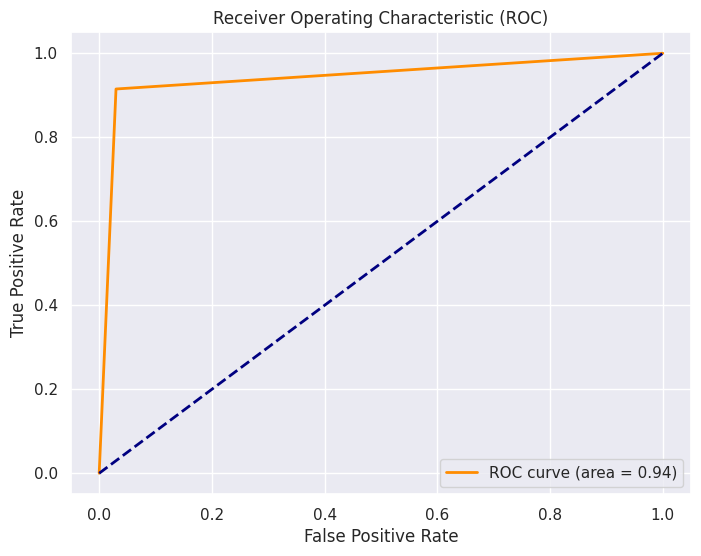

In [150]:
fpr, tpr, thresholds = roc_curve(test_label, y_pred_5)
# Calculate the Area Under the Curve (AUC)
roc_auc = auc(fpr, tpr)
# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' %roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

### SVC Model

In [151]:
model_svc = SVC().fit(train_data_sc,train_label)

In [152]:
y_pred_6 = model_svc.predict(test_data_sc)
y_pred_6

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 1, 0])

In [153]:
print("Accuracy Score : ",accuracy_score(y_pred_6,test_label))

Accuracy Score :  0.9649122807017544


In [154]:
confusion_matrix(y_pred_6,test_label)

array([[66,  3],
       [ 1, 44]])

In [155]:
print(classification_report(y_pred_6,test_label))

              precision    recall  f1-score   support

           0       0.99      0.96      0.97        69
           1       0.94      0.98      0.96        45

    accuracy                           0.96       114
   macro avg       0.96      0.97      0.96       114
weighted avg       0.97      0.96      0.97       114



In [156]:
train_accuracy_svc = cross_val_score(model_svc,train_data_sc,train_label,cv=5).mean()
test_accuracy_svc = cross_val_score(model_svc,test_data_sc,test_label,cv=5).mean()
print(" Train Data Cross_val_score : ",train_accuracy_svc)
print("Test Data Cross_val_score : ",test_accuracy_svc)


 Train Data Cross_val_score :  0.9758241758241759
Test Data Cross_val_score :  0.9470355731225297


In [157]:
accuracy_results["SVC_Accuracy"] = train_accuracy_xgb

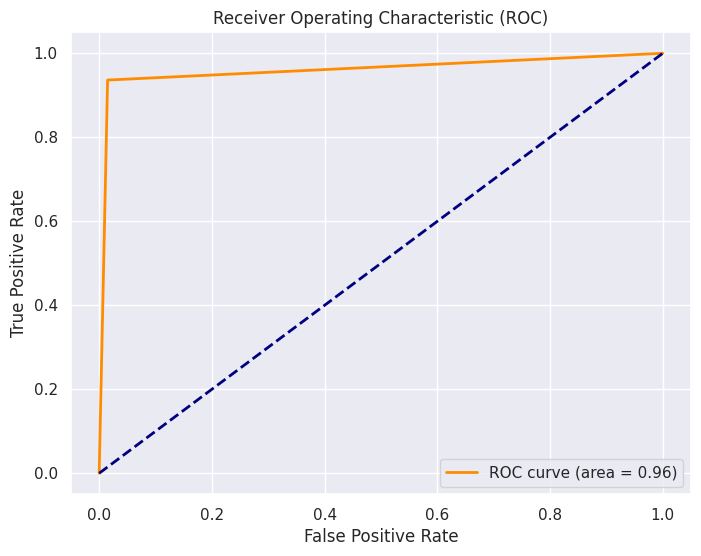

In [158]:
 fpr, tpr, thresholds = roc_curve(test_label, y_pred_6)
# Calculate the Area Under the Curve (AUC)
roc_auc = auc(fpr, tpr)
# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' %roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

### Comparison of Classification Model Accuracies

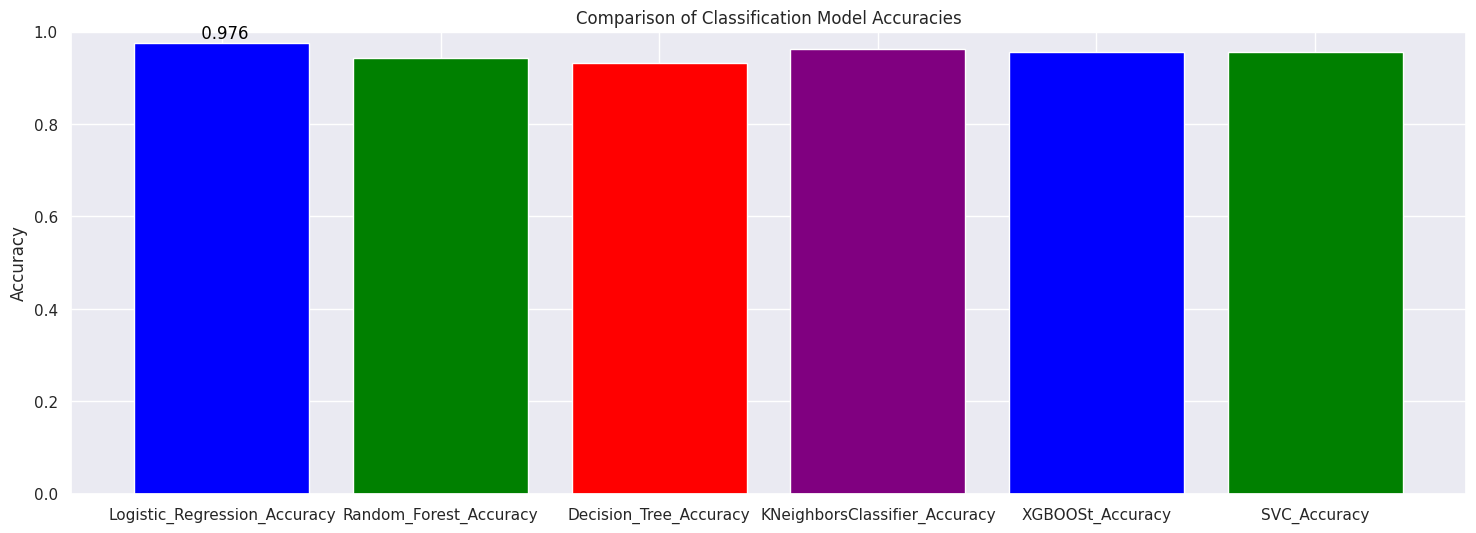

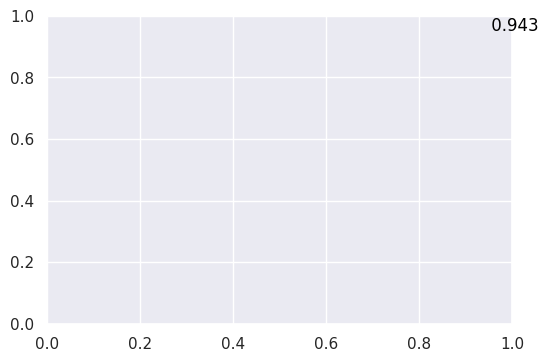

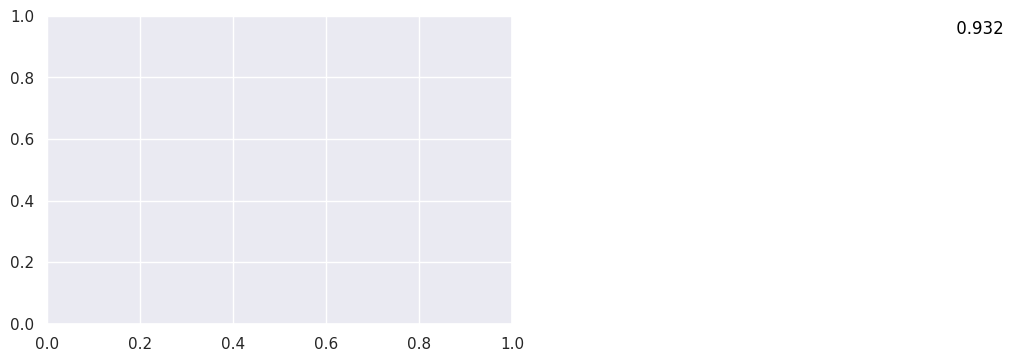

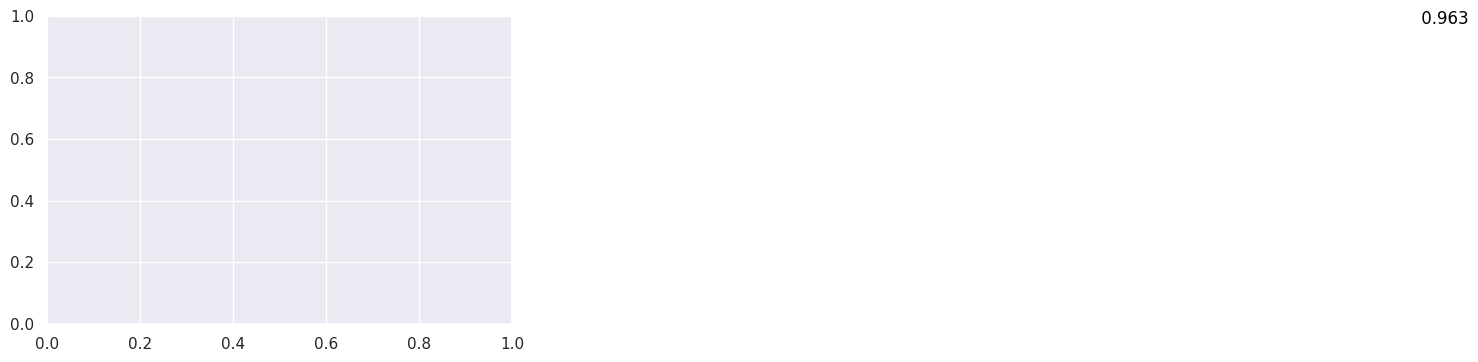

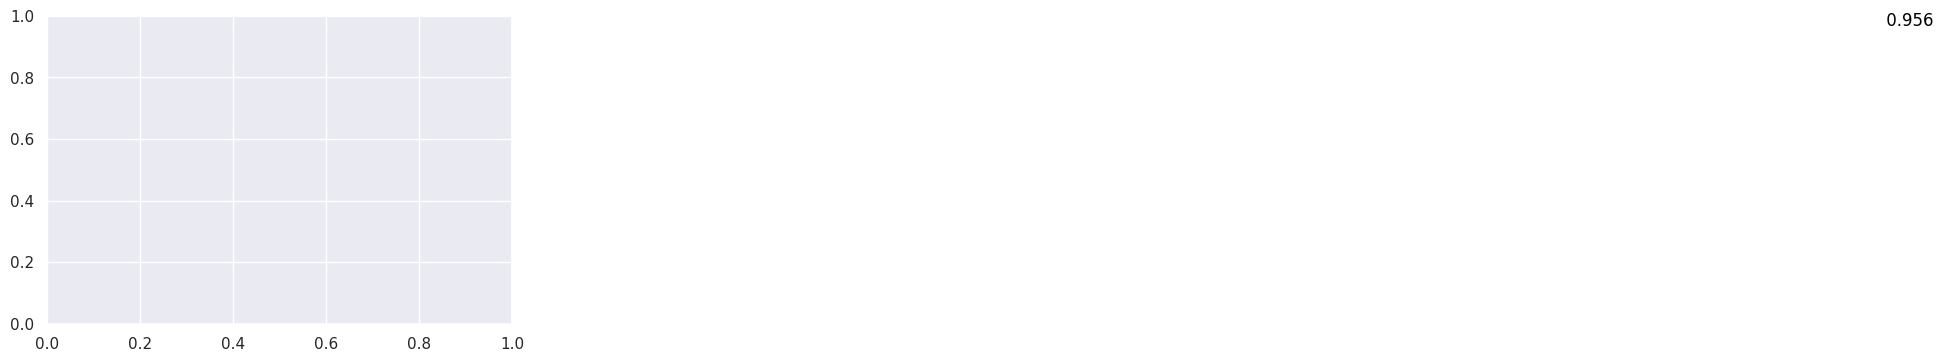

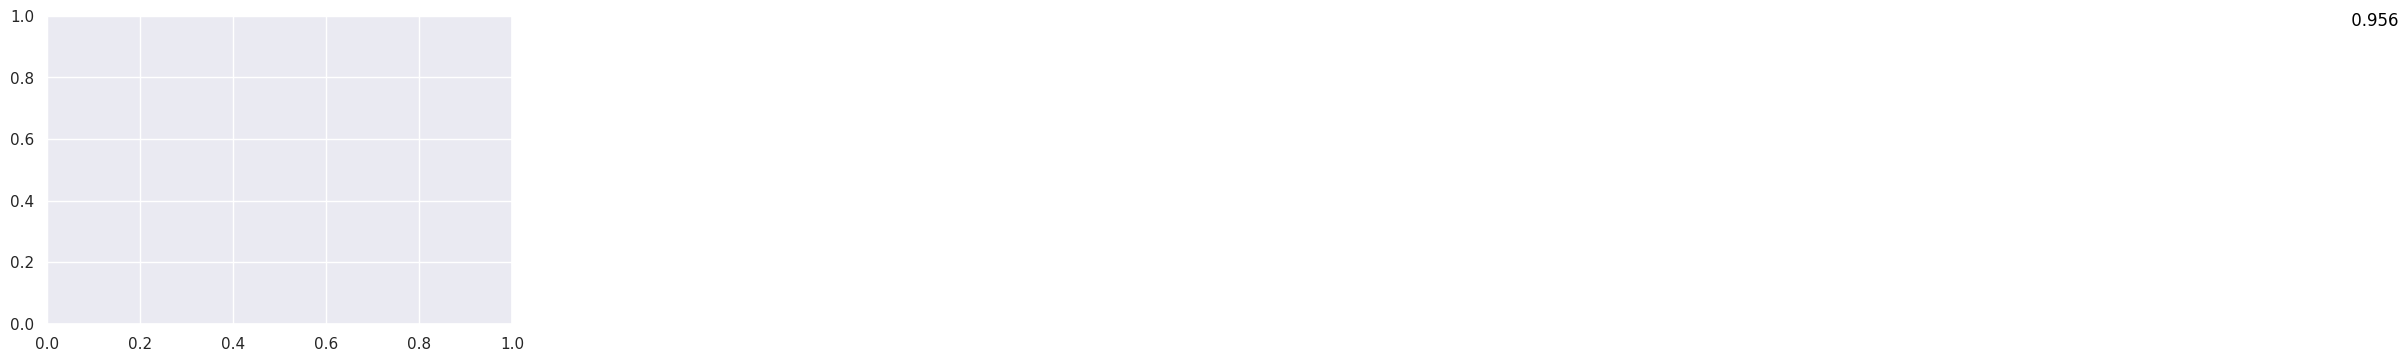

In [159]:
# Plotting the accuracy results
model_names = list(accuracy_results.keys())
accuracy_values = list(accuracy_results.values())
# Plotting the accuracy results using a different style
plt.figure(figsize=(18, 6))
plt.bar(model_names, accuracy_values, color=['blue', 'green', 'red', 'purple'])
plt.ylabel('Accuracy')
plt.title('Comparison of Classification Model Accuracies')
plt.ylim(0, 1)
for i, v in enumerate(accuracy_values):
    plt.text(i, v + 0.01, " {:.3f}".format(v), ha='center', color='black')
    plt.show()
